## PRCP-1020-House Price Prediction using Advanced Regression 

## Importing important libraires 

In [ ]:
# Importing libraries 
import numpy as np 
import pandas as pd 
# Visaulize the plot
import matplotlib.pyplot as plt
#%matplotlibinline
import seaborn as sns 
#remove warniongs 
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

##  Read data set -

In [4]:
# load dataset :
df=pd.read_csv("data.csv")

In [4]:
df # dataframe of 1460 rows and 81 columns

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [2]:
df.shape # number of columns are 1460 and columns are 81

NameError: name 'df' is not defined

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# To show the all columns 
pd.set_option("display.max_columns", 2000)
pd.set_option("display.max_rows", 85)

In [6]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [6]:
# Set index as Id 
df = df.set_index("Id")

In [8]:
df.head(8) #first 8rows 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000


In [10]:
df.describe() # shows stastical of numerical features 


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df.describe().T #T -CHANGES ROWS AND COLUMNS POSITION 

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [9]:
df.describe(include='O')# categorical columns

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [13]:
df.dtypes # data types of each column 

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [16]:
# value counts of each categorical variables , with thier unique values ,most frequent values .
print(df.describe(include='O').value_counts)

<bound method DataFrame.value_counts of        MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4

In [10]:
df.shape # columns becomes 80 

(1460, 80)

In [7]:
# Drop duplicates
'''the more rows of values and columns have the same values or are duplicates. 
    Therefore its very important for you to remove duplicates from the dataset to maintain accuracy 
    and to avoid misleading statistics. '''
df = df.drop_duplicates()
print( df.shape )
# no duplicates in given datasets 

(1460, 80)


In [12]:
# find unique value 
print(df.nunique().sort_values(ascending=False))

LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
TotalBsmtSF       721
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        327
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
YearBuilt         112
LotFrontage       110
GarageYrBlt        97
ScreenPorch        76
YearRemodAdd       61
Neighborhood       25
LowQualFinSF       24
MiscVal            21
3SsnPorch          20
Exterior2nd        16
MSSubClass         15
Exterior1st        15
MoSold             12
TotRmsAbvGrd       12
OverallQual        10
SaleType            9
Condition1          9
OverallCond         9
HouseStyle          8
PoolArea            8
Condition2          8
BedroomAbvGr        8
RoofMatl            8
Functional          7
BsmtFinType2        6
Heating             6
GarageType          6
BsmtFinType1        6
SaleCondition       6
Foundation          6
RoofStyle           6
FireplaceQ

## 2. EXPLORATORY DATA ANALYSIS -with data analysis 
-Using EDA  :Visualize fesatures, insight /observation from the data 
- Missing Values
- All The Numerical Variables
- Distribution of the Numerical Variables
- Categorical Variables
- Cardinality of Categorical Variables
- Outliers


In [8]:
# Seperate numerical & categorical columns 
cat_cols=df.select_dtypes(include=['object']).columns # categorical columns 
num_cols = df.select_dtypes(include=np.number).columns.tolist() # numerical columns 


print("Categorical Variables:", len(cat_cols))
print(cat_cols)


Categorical Variables: 43
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [9]:
#Numerical variables:
print("Numerical Variables:", len(num_cols))
print(num_cols)

Numerical Variables: 37
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [10]:
df.select_dtypes(include=['int64', 'float64']).columns # shows integer ,floating numerical columns 


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Check the distribution of target column - 
- log transformation due to right positive skewness:
- It should be normal distribution

In [11]:
# check the distrubution of target varible i.e SalePrcie 
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

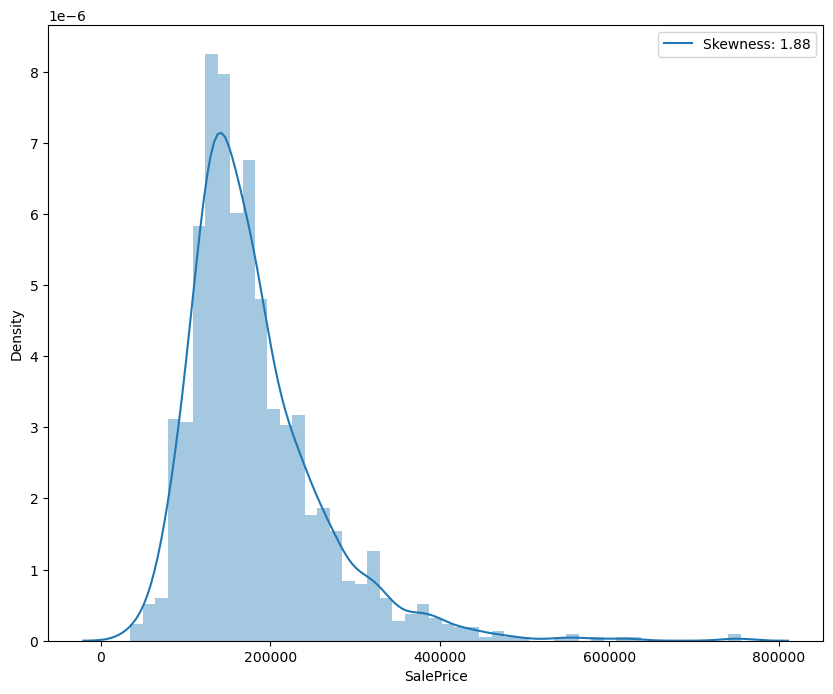

In [12]:
# Plot the distplot of target
plt.figure(figsize=(10,8))
bar = sns.distplot(df["SalePrice"],kde=True)
bar.legend(["Skewness: {:.2f}".format(df['SalePrice'].skew())])
plt.show()

### log transformation on sale price -right skewness 

In [13]:
# Positive Skeweness:
df['SalePrice'].skew()

1.8828757597682129

In [14]:
df["SalePrice"] = np.log1p(df["SalePrice"]) # log transoformation 

Text(0.5, 1.0, 'plot of SalePrice after Log Transformation')

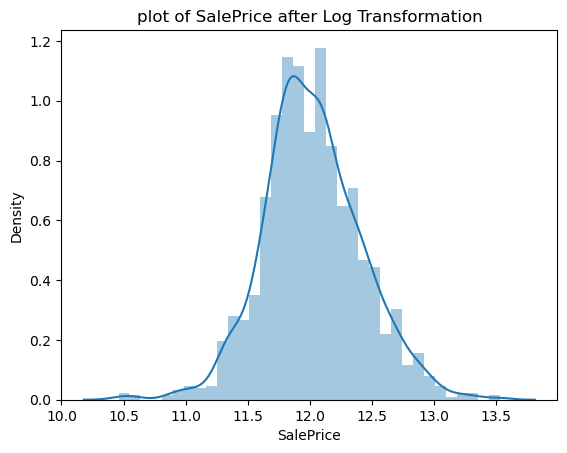

In [15]:
 #SalePrice after Log-transformation
sns.distplot(df["SalePrice"])
plt.title("plot of SalePrice after Log Transformation")

In [16]:
# again check skewness :
# Positive Skeweness:
df['SalePrice'].skew() # very less value of skewness .

0.12134661989685333

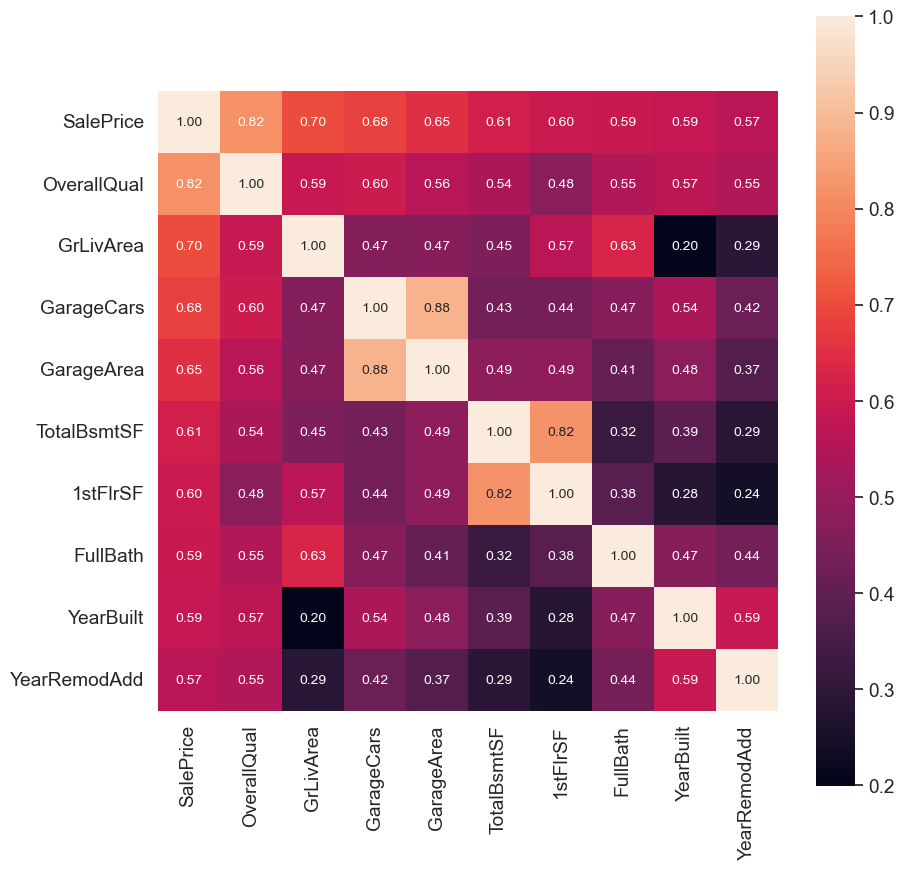

affecting target varaible most :  Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd'],
      dtype='object') 10


In [19]:
# Before going to data prerocessing  find out top variables affecting sale price:
#saleprice correlation matrix of most top 10 varaibles 
corrmat = df.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
print("affecting target varaible most : ", cols, len(cols))

In [17]:
#values of correlation : highly positively correlated features 
abs(df.corr()['SalePrice']).nlargest(10)

SalePrice       1.000000
OverallQual     0.817185
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
Name: SalePrice, dtype: float64

In [ ]:
# Transforming the target variable, GrLivArea and OverallQualto log values so that the error is equally impactful.

In [18]:
print(df['GrLivArea'].skew(),df['TotalBsmtSF'].skew(), df['1stFlrSF'].skew(), 
      df['GarageArea'].skew())
#check skew  greater than 1 

1.3665603560164552 1.5242545490627664 1.3767566220336365 0.17998090674623907


In [19]:
from scipy import stats  # from scipy package import stats  

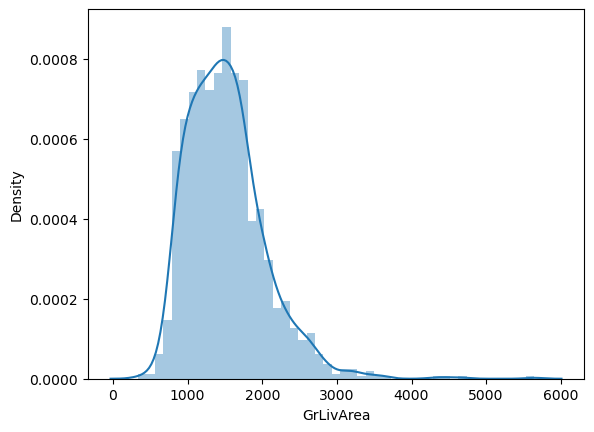

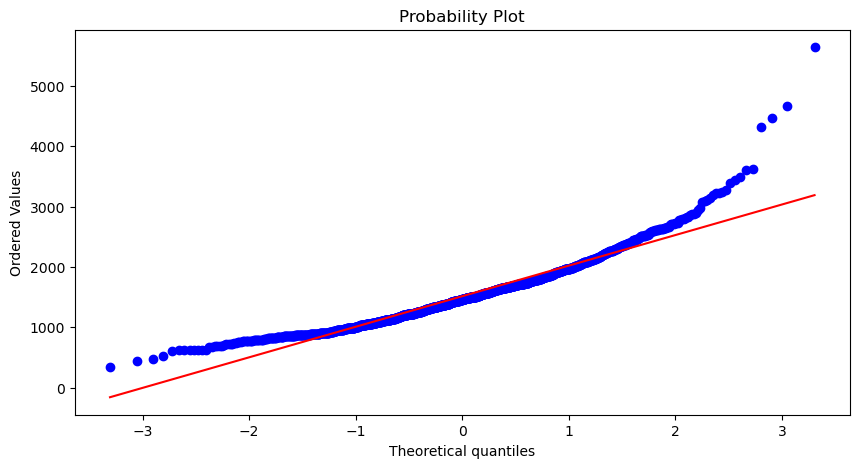

In [20]:
sns.distplot(df['GrLivArea']);
fig_GrLivArea = plt.figure(figsize=(10,5))
result1 = stats.probplot(df['GrLivArea'],plot = plt)
plt.show()


In [20]:
df['GrLivArea'] = np.log1p(df['GrLivArea'])
print("AFTER LOG TRANSFORMATION  GrLivArea SKEWNESS :", df['GrLivArea'].skew())

AFTER LOG TRANSFORMATION  GrLivArea SKEWNESS : -0.006140253486287281


## 3. Datapreprocessing 
- Data preprocessing- is the process of cleaning and preparing the raw data to enable feature engineering.
- Feature Engineering covers various data engineering techniques such as adding/removing relevant features, handling missing data, encoding the data, handling categorical variables, etc
- handling missing values 
- handling outliers 
- drop duplicates 
- handling categorical varaibles 
- scaling 

In [23]:
#sum of missing data
df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtCond           37
BsmtQual           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
MSSubClass          0
Fireplaces          0
Functional          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
CentralAir

In [21]:
# Get the percentages of null values of each column 
null_percent = (df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)
null_percent

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtCond          2.534247
BsmtQual          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
MSSubClass        0.000000
Fireplaces        0.000000
Functional        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

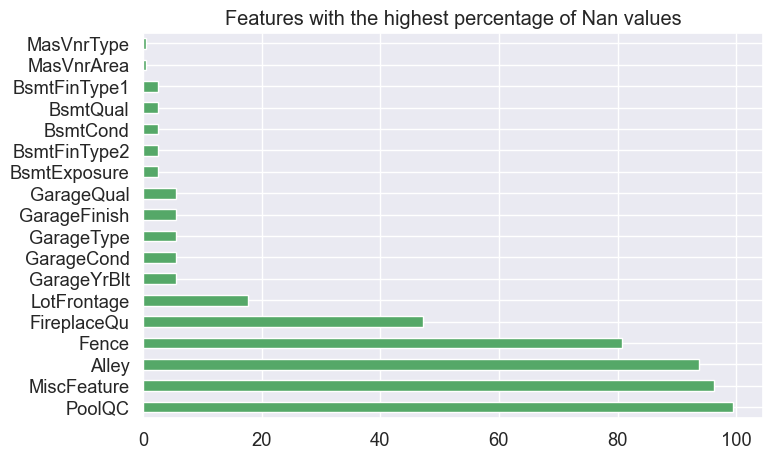

In [42]:
# Shows null values bar graph 
plt.figure(figsize=(8, 5))

sns.set(font_scale=1.2)
null_percent[null_percent > 0.1].plot(kind = "barh",color='g') # horizontal bar
plt.title("Features with the highest percentage of Nan values")
plt.show()

In [22]:
# We have to drop some columns which contains large number of null values and more than 90% data missing in these 5 columns
#  DROP THESE 5 features  for model
drop_variables = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
df.drop(drop_variables, axis = 1, inplace=True)

# Now, both the columns with more than 90% missing values and their respective rows are removed from the DataFrame.

In [23]:
df.dropna(subset=drop_variables, inplace=True) # corresponding null rows also delete.
df
# # 5 columns get droped 
# most null values columns are
- ALLEY ,PoolQC  ,MiscFeature,  Fence, FireplaceQu

KeyError: ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [24]:
df.shape

(1460, 75)

In [25]:
# some columns are missing values  missing values .greater than 10% 

col_nan = df.isna().sum() / df.shape[0]

In [26]:
col_nan.sort_values(ascending=False)

LotFrontage      0.177397
GarageType       0.055479
GarageYrBlt      0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageCond       0.055479
BsmtFinType2     0.026027
BsmtExposure     0.026027
BsmtQual         0.025342
BsmtCond         0.025342
BsmtFinType1     0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
FullBath         0.000000
BsmtHalfBath     0.000000
BsmtFullBath     0.000000
KitchenQual      0.000000
GrLivArea        0.000000
TotRmsAbvGrd     0.000000
Functional       0.000000
MSSubClass       0.000000
Fireplaces       0.000000
ScreenPorch      0.000000
SaleCondition    0.000000
SaleType         0.000000
YrSold           0.000000
MoSold           0.000000
MiscVal          0.000000
PoolArea         0.000000
3SsnPorch        0.000000
2ndFlrSF         0.000000
EnclosedPorch    0.000000
OpenPorchSF      0.000000
WoodDeckSF       0.000000
PavedDrive  

In [27]:
df.columns[df.isnull().any()] # these columns having missing values 

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

In [28]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

print("categorical_cols", categorical_cols,len(categorical_cols))
print("numerical_cols: ", numerical_cols, len(numerical_cols))

# after droping some columns :
#categorical_cols=38 and  numerical_cols :37

categorical_cols Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object') 38
numerical_cols:  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'F

In [29]:
#missing categorical as well as numerical column list :

categorical_cols_with_missing = df[categorical_cols].columns[df[categorical_cols].isnull().any()].tolist() # missing categorical 

numerical_cols_with_missing = df[numerical_cols].columns[df[numerical_cols].isnull().any()].tolist()# missing numerical columns

print("categorical_cols_with_missing are :",len(categorical_cols_with_missing))

print("numerical_cols_with_missing are :",len(numerical_cols_with_missing))


categorical_cols_with_missing are : 11
numerical_cols_with_missing are : 3


#####  HANDLING MISSING VALUES MEDIAN AND MODE USING FOR LOOP[:]

In [30]:
# handle with mean ,mode median of missing value using for loop :
for col in numerical_cols_with_missing:
    df[col].fillna(df[col].median(), inplace=True) # change with median value

    
    
for col in categorical_cols_with_missing:
    mode_val = stats.mode(df[col]).mode[0] # replace categorical columns by mode value.
    df[col].fillna(mode_val, inplace=True)
print(df.isnull().sum().sum()) # no null values are present 

0


#### # CONVERT COLUMNS INTO SAME DATATYPE 
- Need to be - all  datatype features is  convert  into same datatype , so convert float into int 64 

In [31]:
# Need to all datatype into same datatype so convert float into int 64 
# LotFrontage,  MasVnrArea - float 64 type into int 64
# convert sale price into int 64 -SalePrice
df['LotFrontage'] = df['LotFrontage'].astype(np.int64)
df['MasVnrArea'] = df['MasVnrArea'].astype(np.int64)

df['SalePrice'] = df['SalePrice'].astype(np.int64)
df['GarageYrBlt']=df['GarageYrBlt'].astype(np.int64)

#### OUTLIER DETECTION AND REMOVAL :  MOST IMP

### Detecting outliers check skewness and kurtosis of columns as well ,
##### so we will get is it  normaly distributed or not ?


In [32]:
#NORMALLY DISTRIBUTED OR NOT ?  
from scipy.stats import skew, kurtosis

numerical_cols = df.select_dtypes(include=[np.number]).columns
columns = numerical_cols # Replace with the actual column names

# Check normality for each column- 

for column in columns:
    data = df[column]
    
    # Calculate skewness and kurtosis
    skewness = skew(data)
    kurt = kurtosis(data)
    
    # Assess normality: 
    if abs(skewness) <= 1 and abs(kurt) <= 3:  # skewness =1 and Kurtsosi= 3 
        print(f"Column:{column} is normally distributed")
    else:
        print(f"Column:{column} is not normally distributed" )

Column:MSSubClass is not normally distributed
Column:LotFrontage is not normally distributed
Column:LotArea is not normally distributed
Column:OverallQual is normally distributed
Column:OverallCond is normally distributed
Column:YearBuilt is normally distributed
Column:YearRemodAdd is normally distributed
Column:MasVnrArea is not normally distributed
Column:BsmtFinSF1 is not normally distributed
Column:BsmtFinSF2 is not normally distributed
Column:BsmtUnfSF is normally distributed
Column:TotalBsmtSF is not normally distributed
Column:1stFlrSF is not normally distributed
Column:2ndFlrSF is normally distributed
Column:LowQualFinSF is not normally distributed
Column:GrLivArea is normally distributed
Column:BsmtFullBath is normally distributed
Column:BsmtHalfBath is not normally distributed
Column:FullBath is normally distributed
Column:HalfBath is normally distributed
Column:BedroomAbvGr is normally distributed
Column:KitchenAbvGr is not normally distributed
Column:TotRmsAbvGrd is normall

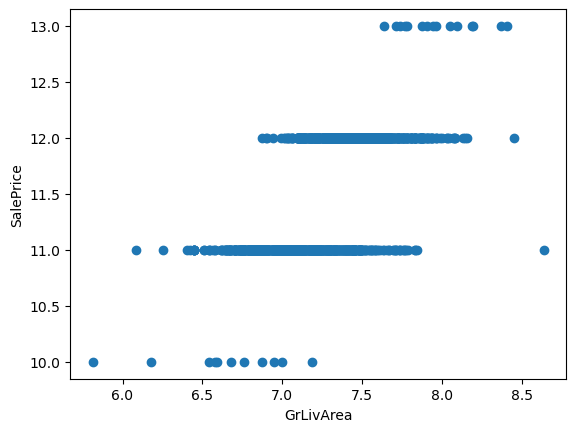

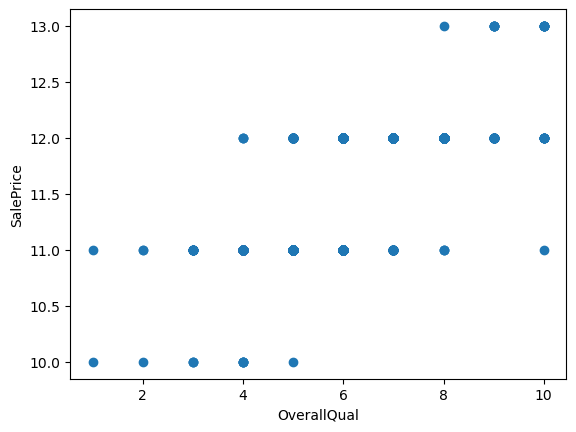

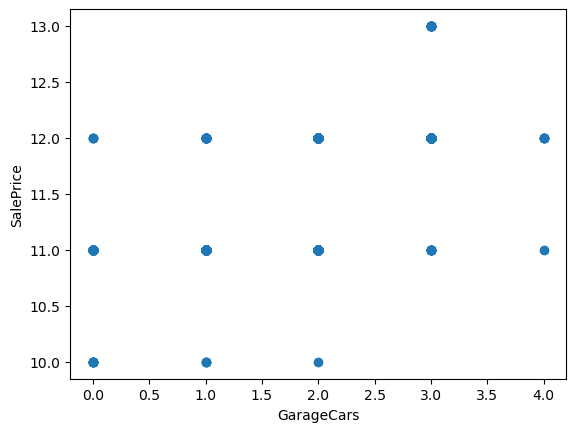

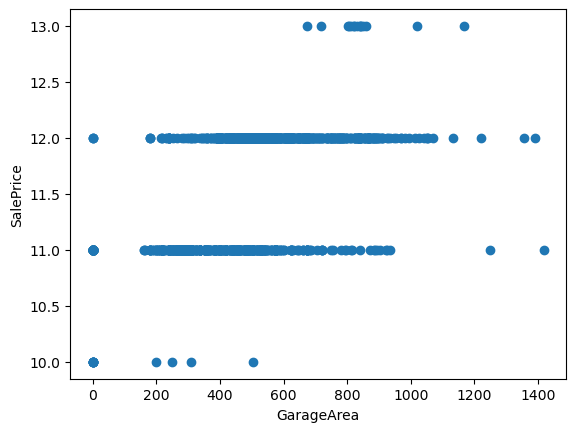

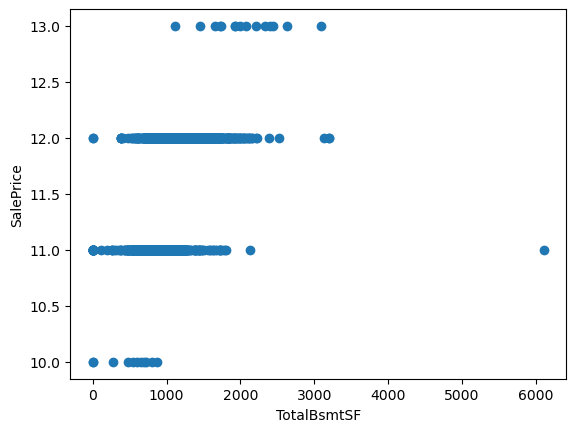

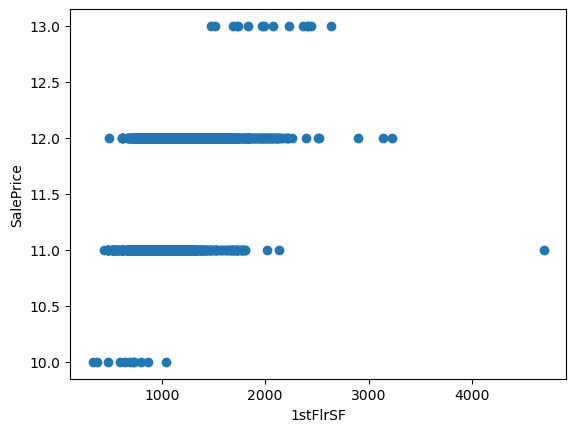

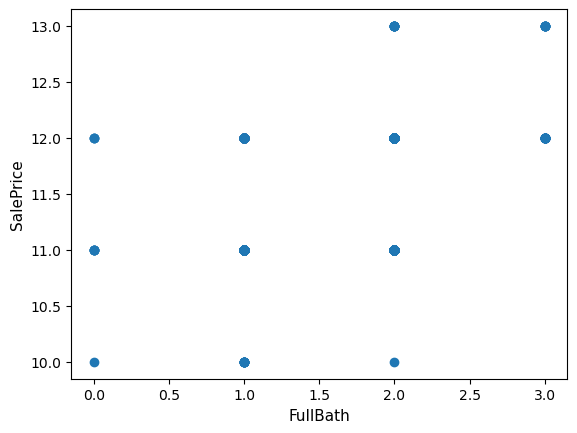

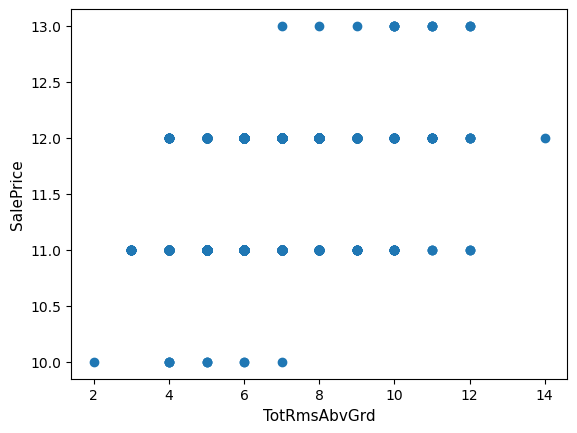

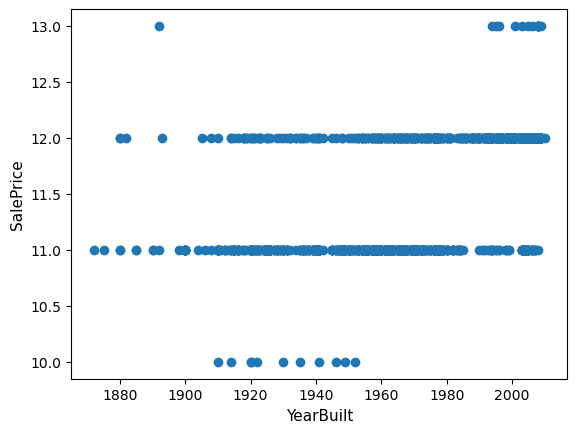

In [33]:
# plot outliers columns using scatter plots
# we are going detect outliers in whole dataset

fig = plt.subplots()
plt.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('GrLivArea', fontsize=10)
plt.show()

fig1= plt.subplots()
plt.scatter(x = df['OverallQual'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('OverallQual', fontsize=10)
plt.show()

fig2= plt.subplots()
plt.scatter(x = df['GarageCars'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('GarageCars', fontsize=10)
plt.show()

fig3= plt.subplots()
plt.scatter(x = df['GarageArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('GarageArea', fontsize=10)
plt.show()

fig4= plt.subplots()
plt.scatter(x = df['TotalBsmtSF'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('TotalBsmtSF', fontsize=10)
plt.show()

fig5= plt.subplots()
plt.scatter(x = df['1stFlrSF'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('1stFlrSF', fontsize=10)
plt.show()

fig6= plt.subplots()
plt.scatter(x = df['FullBath'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=11)
plt.xlabel('FullBath', fontsize=11)
plt.show()

fig7= plt.subplots()
plt.scatter(x = df['TotRmsAbvGrd'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=11)
plt.xlabel('TotRmsAbvGrd', fontsize=11)
plt.show()

fig8= plt.subplots()
plt.scatter(x = df['YearBuilt'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=11)
plt.xlabel('YearBuilt', fontsize=11)
plt.show()

In [39]:
# df[['1stFlrSF','SalePrice']].describe()

In [34]:
# above all highly correlated  feature with output so i check thier outliers .
# we drop some outliers from specfic range 
df = df.drop(df[(df['GrLivArea']>8.6) & (df['SalePrice']<13.5)].index)
df = df.drop(df[(df['GarageArea']>1300) & (df['SalePrice']<13.5)].index)
df = df.drop(df[(df['TotalBsmtSF']>3000) & (df['SalePrice']<13.5)].index)
df = df.drop(df[(df['1stFlrSF']>3000) & (df['1stFlrSF']<13.5)].index)
#you will get an idea of which points are outliers. and below code is used to delete outliers.

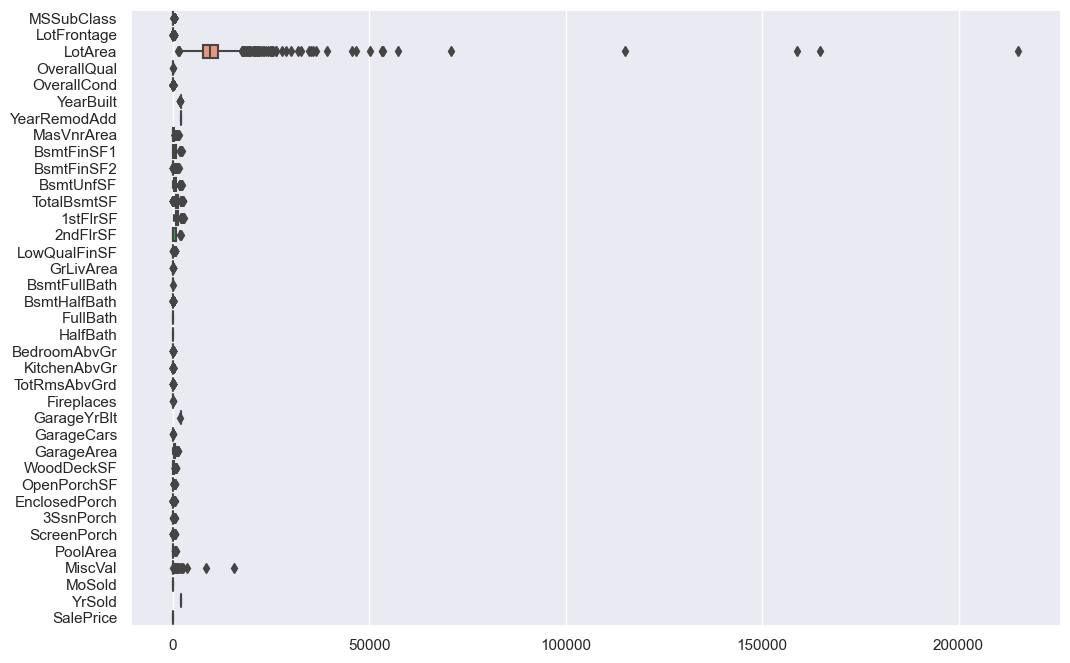

In [55]:
#check outliers 
plt.figure(figsize=(12, 8))
sns.set_theme(style="darkgrid")
sns.set_palette("GnBu")
ax = sns.boxplot(data=df, orient="h")
plt.show()

In [37]:
df.LotFrontage.describe()

count    1453.000000
mean       69.602202
std        21.041185
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

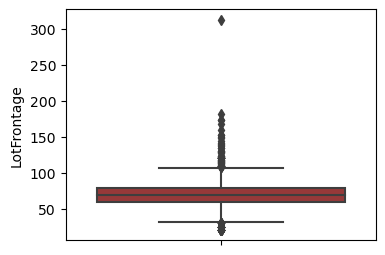

In [38]:
# box plot of numeric column only
plt.figure(figsize=(4,3 ))

sns.boxplot(y=df['LotFrontage'],orient="h",color="brown")

plt.show()

In [35]:
# Check skenwess then handle the outliers

print('skewness value of : ',df['LotFrontage'].skew()) # no skew found 
print('skewness value of : ',df['LotArea'].skew())
# skew value between -1 to 1 so i rpleace with median value 
# LotFrontage area increse sale prize also increase so need to remove LotFrontage outliers . 

skewness value of :  1.729525073719968
skewness value of :  12.620650803812744


In [36]:
# using detection percentile choose 10 % and 90%
print(df['LotFrontage'].quantile(0.10)) # 1
print(df['LotFrontage'].quantile(0.90))


# we will do the flooring (e.g., the 10th percentile) for the lower values and 
'''capping (e.g., the 90th percentile) for the higher values '''

49.0
92.0


'capping (e.g., the 90th percentile) for the higher values '

In [37]:
print(df['LotArea'].quantile(0.10)) # 2
print(df['LotArea'].quantile(0.90))

5000.0
14294.399999999998


In [38]:
# remove outliers using where df["LotFrontage"]
df["LotFrontage"] = np.where(df["LotFrontage"] <49.0, 49.0,df['LotFrontage'])
df["LotFrontage"] = np.where(df["LotFrontage"] >91.0, 91.0,df['LotFrontage'])
print(df['LotFrontage'].skew()) # normal distribution 
# it removes some outliers 

0.1229750086400216


In [39]:
#remove outliers using where : df ["LotArea"]
df["LotArea"] = np.where(df["LotArea"] <5000.0, 5000.0,df['LotArea'])
df["LotArea"] = np.where(df["LotArea"] >14226.400000000001, 14226.400000000001,df['LotArea'])
print(df['LotArea'].skew())
# it removes some outliers 

0.06904789634513771


### 3. EDA - DATA VISUALIZATION 
- I.UNIVARIATE ANALYSIS -Categorical variables can be visualized using a Count plot, 
Bar Chart, Pie Plot, etc.
- Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, 
- II. BIVARIATE ANALYSIS:
- Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.
-For Numerical variables, Pair plots and Scatter plots are widely been used to do Bivariate Analysis.

-A Stacked bar chart can be used for categorical variables if the output variable is a classifier. Bar plots can be used if the output variable is continuous

- III. Multivariate Analysis
-A heat map is widely been used for Multivariate Analysis

-Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.



- Univariate analysis can be done for both Categorical and Numerical variables.

In [40]:
## identifying numeric variables
numeric = df.select_dtypes(include=['float64','int64'])
numeric = numeric.columns

In [41]:
print(numeric, len(numeric)) # allready i checked distribution of numerical data with their skewness, handling outliers . 
'''please go and check histogram plots of numerical columns only. '''

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object') 37


'please go and check histogram plots of numerical columns only. '

-  DISTRIBUTIUTION OF NUMERICAL FEATURES : Numerical columns plot:

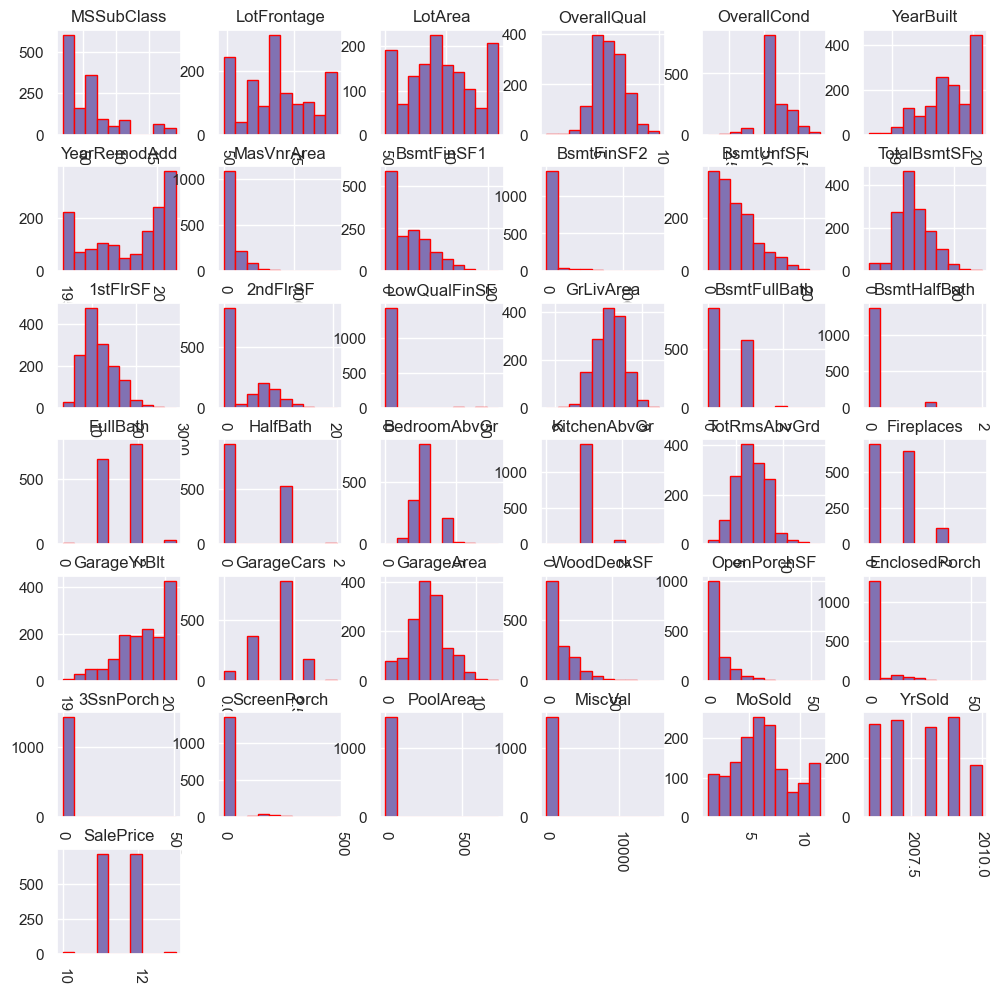

In [66]:
# DISTRIBUTIUTION OF NUMERICAL FEATURES : Numerical columns plot:
df.hist(figsize=(12,12), xrot=-90, bins=10, color = "m",ec="red") ## Display the labels rotated by 45 degress
plt.show()

#### Plot categorical columns :using countplot(),piechart()

In [42]:
# plot categorical columns
##identifying categorical variables
categorical = df.select_dtypes(include=['object'])
categorical = categorical.columns

In [43]:
print("categorical columns :", categorical,"length is ",len(categorical))

categorical columns : Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object') length is  38


- 1.pie chart :  for categorical columns:

<AxesSubplot:ylabel='Street'>

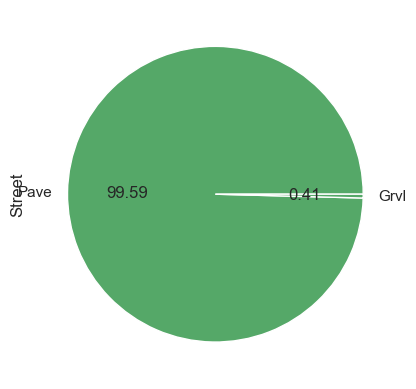

In [73]:
# pie chart for categorical variable .ieStreet
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
df["Street"].value_counts().plot(kind='pie',autopct='%.2f',colors='g') 

- street column show only one pave constant value so we drop in future. 

<AxesSubplot:ylabel='Utilities'>

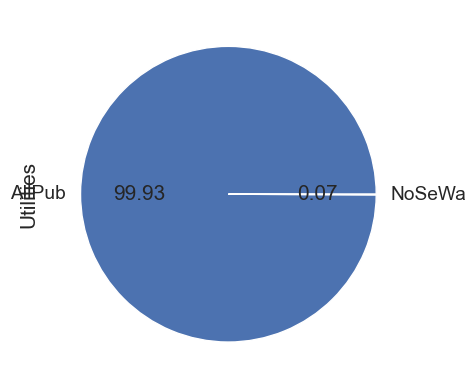

In [94]:
df["Utilities"].value_counts().plot(kind='pie',autopct='%.2f') 

- same as street column show only Utilities -  one ALL PUB - constant value so we  can drop in future.

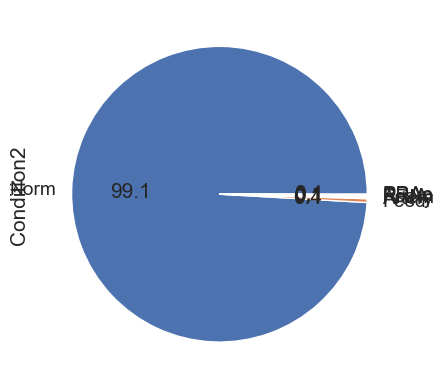

In [101]:
# Condition1
df["Condition2"].value_counts().plot(kind='pie',autopct='%.1f') 
plt.show()
# same as above two columns we can drop in future - Condition2

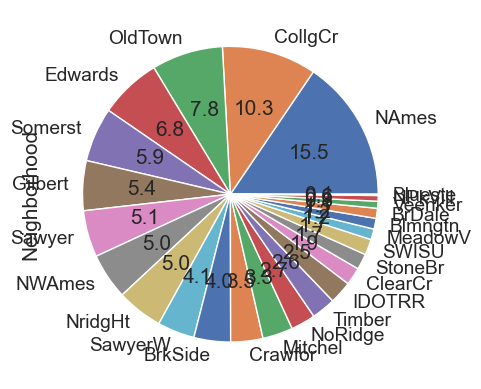

In [103]:
# Neighborhood
df["Neighborhood"].value_counts().plot(kind='pie',autopct='%.1f') 
plt.show()

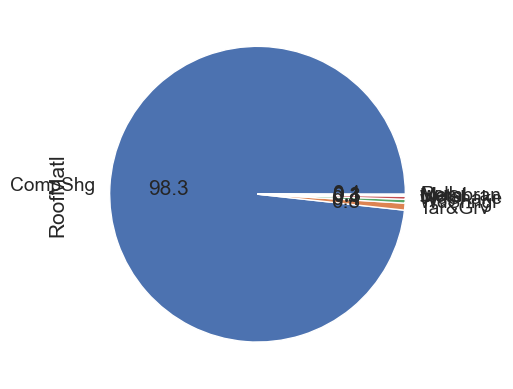

In [106]:
# RoofMatl
df["RoofMatl"].value_counts().plot(kind='pie',autopct='%.1f') 
plt.show()

In [ ]:
#RoofMatl -insight one material constant value we can drop .it is not affecting the sale price. 

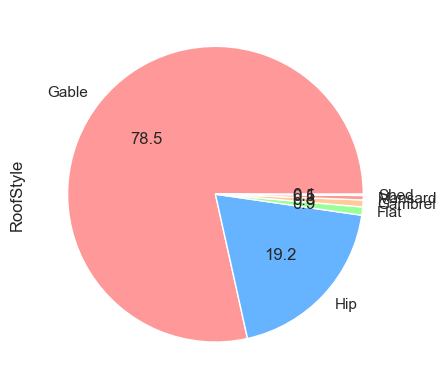

In [69]:
# RoofStyle: Gabel type roofstyling most houses are there.
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
df["RoofStyle"].value_counts().plot(kind='pie',autopct='%.1f',colors=colors) 
plt.show()

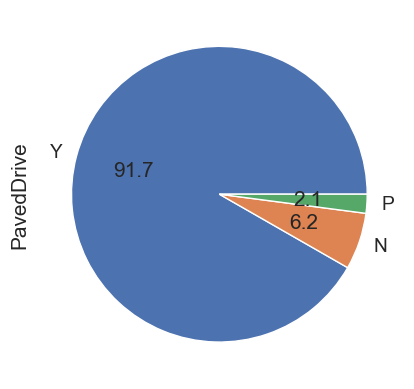

In [109]:
#PavedDrive
df["PavedDrive"].value_counts().plot(kind='pie',autopct='%.1f') 
plt.show()

- PavedDrive -insight is most houses are pavedrive area 91.7% it important feature when buy house.

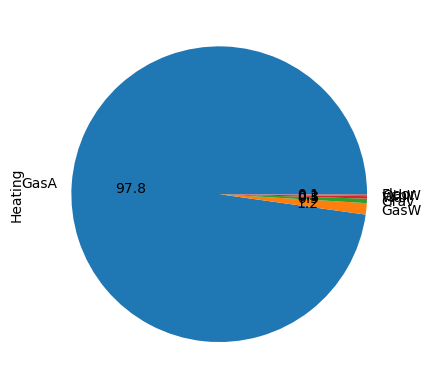

In [53]:

df["Heating"].value_counts().plot(kind='pie',autopct='%.1f') 
plt.show()

- Heating - In all houses heating system are provided almost 97.8 %

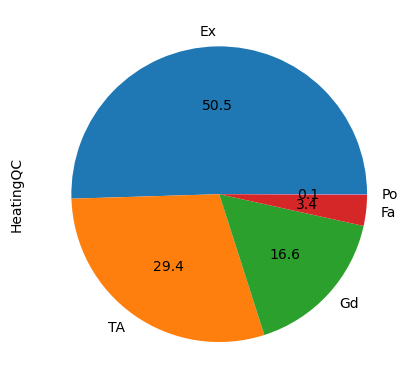

In [54]:
df["HeatingQC"].value_counts().plot(kind='pie',autopct='%.1f') 
plt.show()

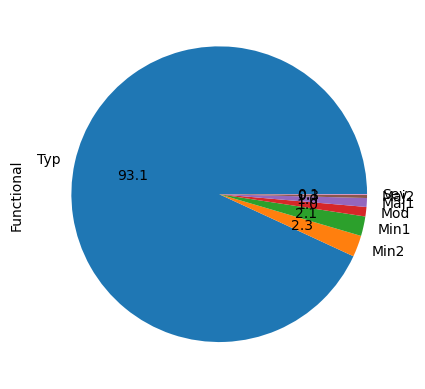

In [55]:
#Functional-
df["Functional"].value_counts().plot(kind='pie',autopct='%.1f') 
plt.show()

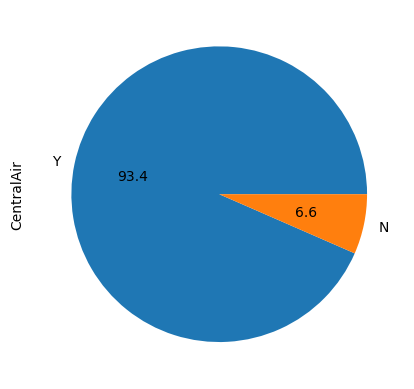

In [56]:
# CentralAir', 'Electrical', 'KitchenQual',
df["CentralAir"].value_counts().plot(kind='pie',autopct='%.1f')

plt.show()

<AxesSubplot:ylabel='Electrical'>

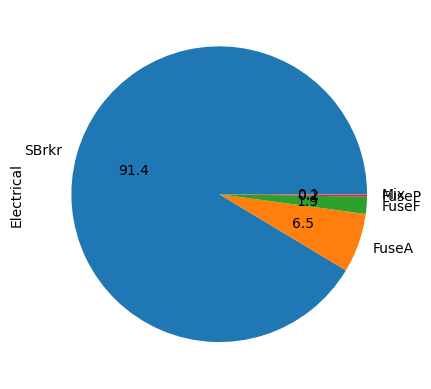

In [57]:
df["Electrical"].value_counts().plot(kind='pie',autopct='%.1f')

<AxesSubplot:ylabel='KitchenQual'>

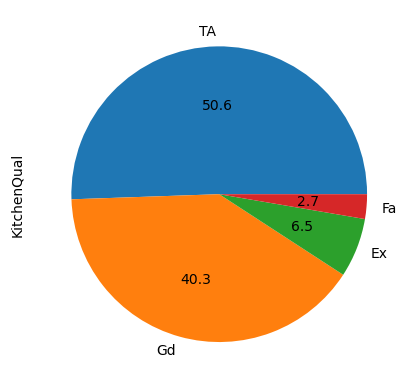

In [58]:
# KitchenQual-
df["KitchenQual"].value_counts().plot(kind='pie',autopct='%.1f')

### Plot bar /countplot - categorical columns -

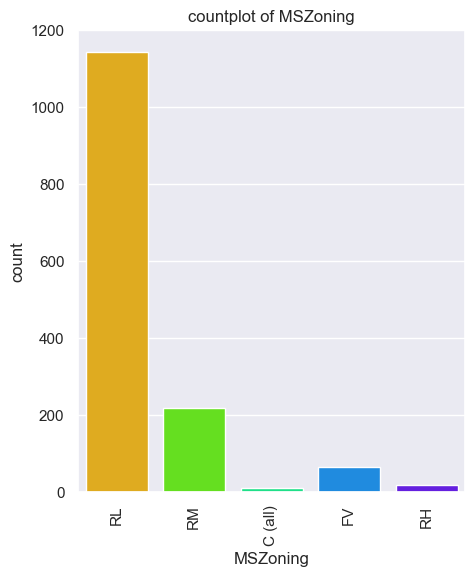

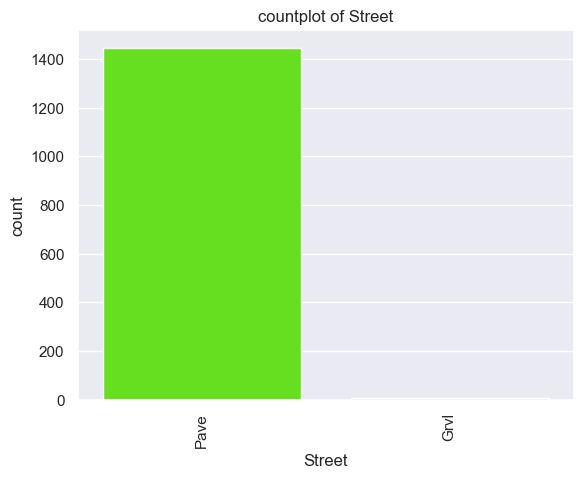

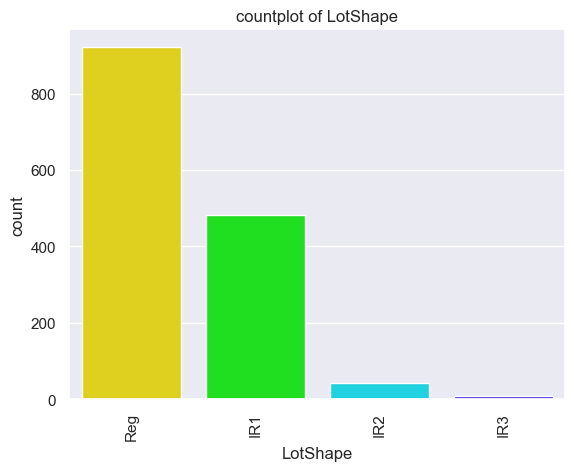

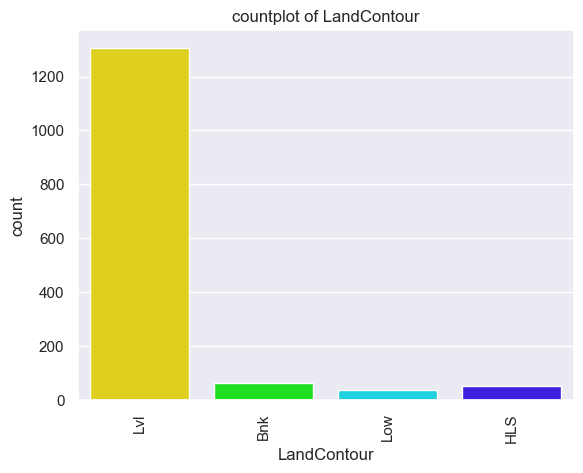

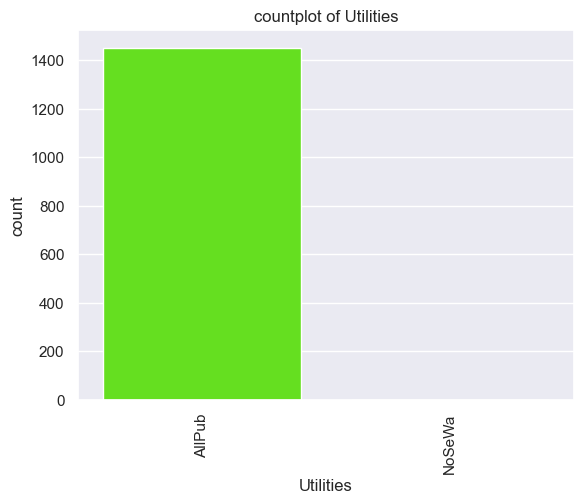

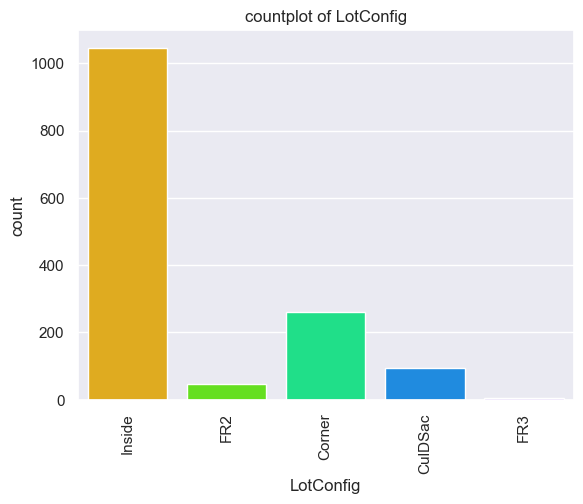

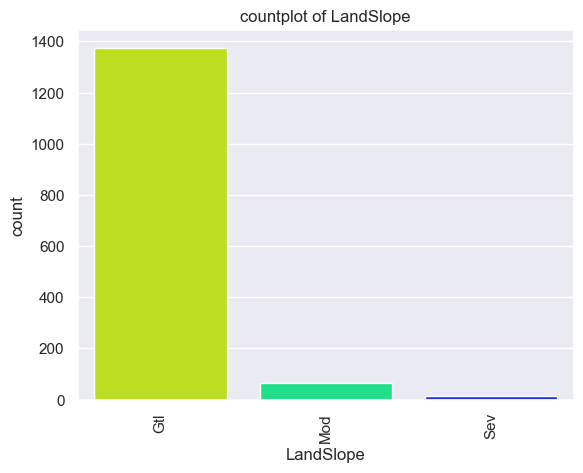

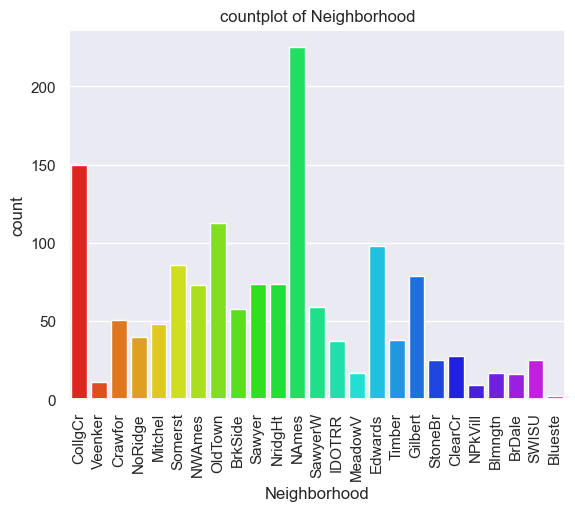

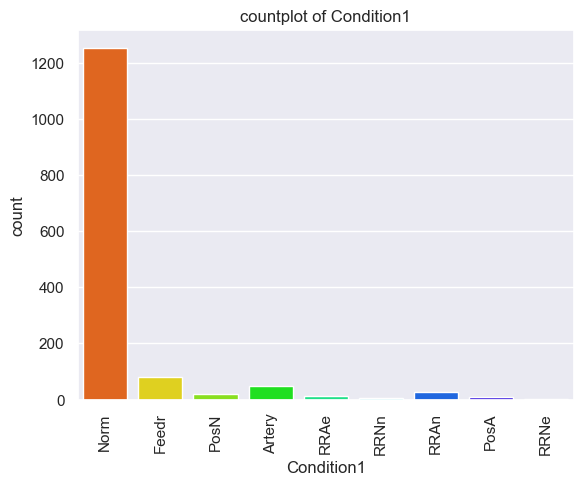

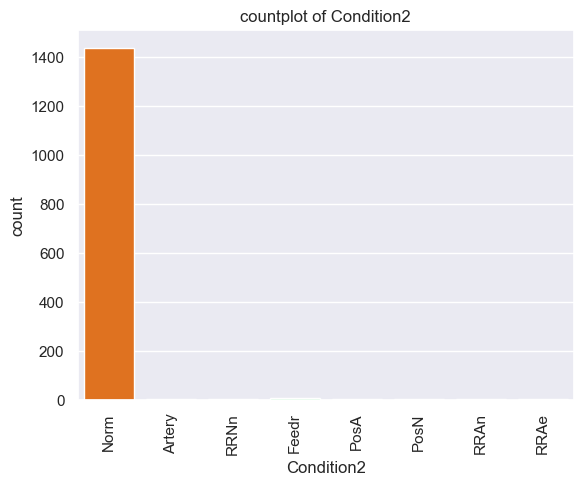

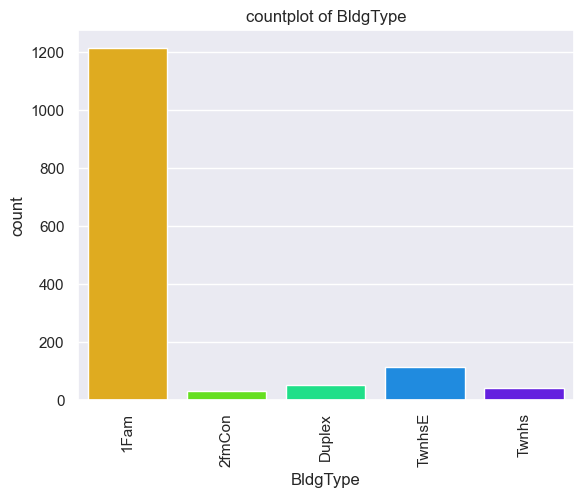

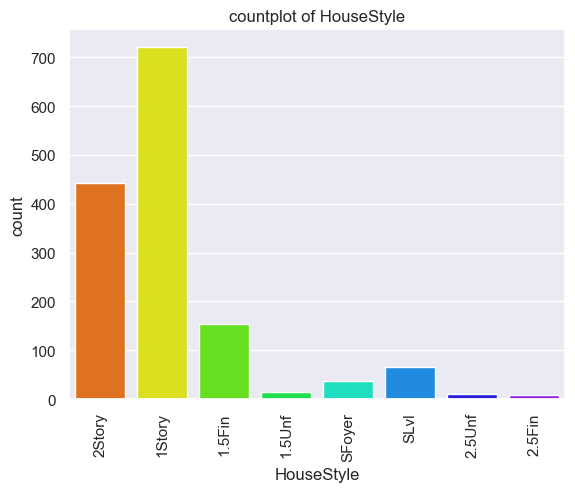

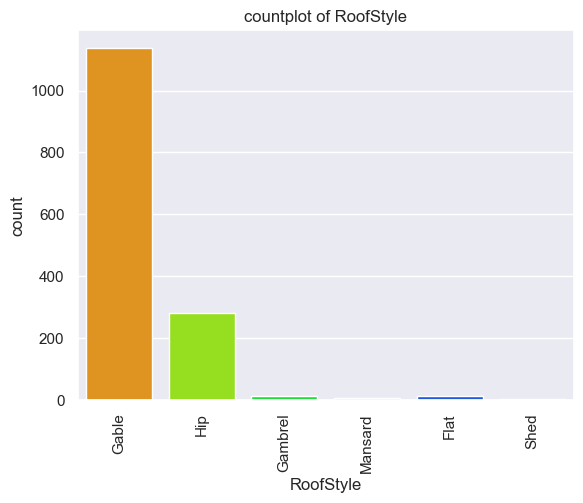

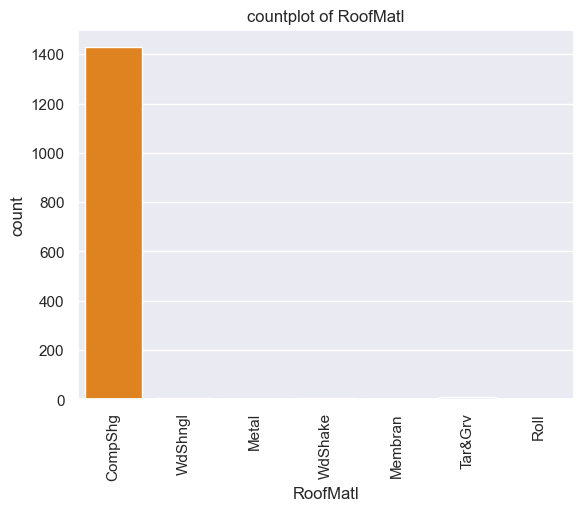

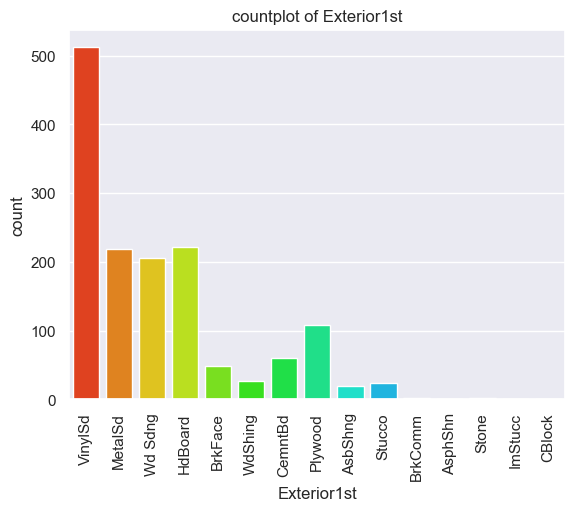

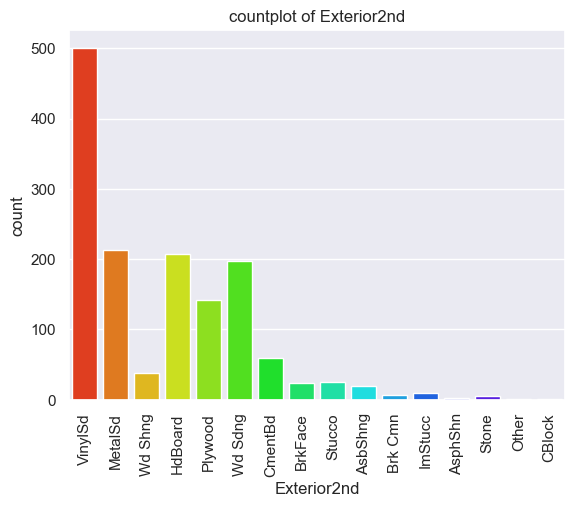

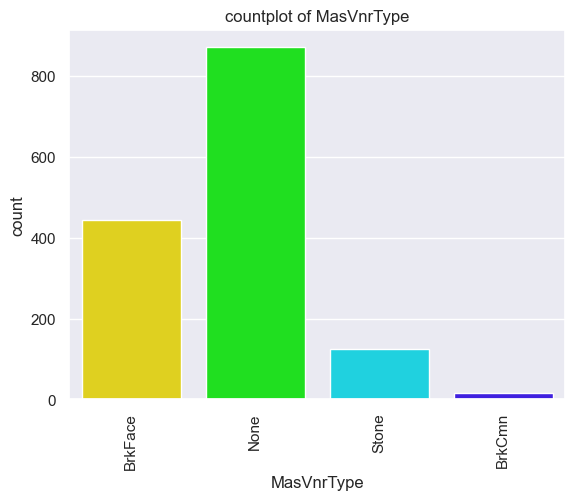

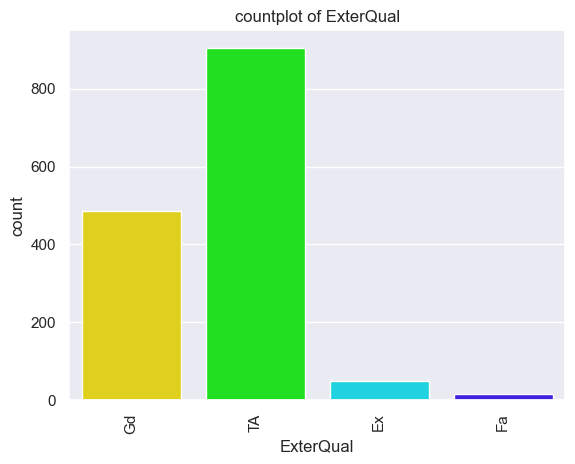

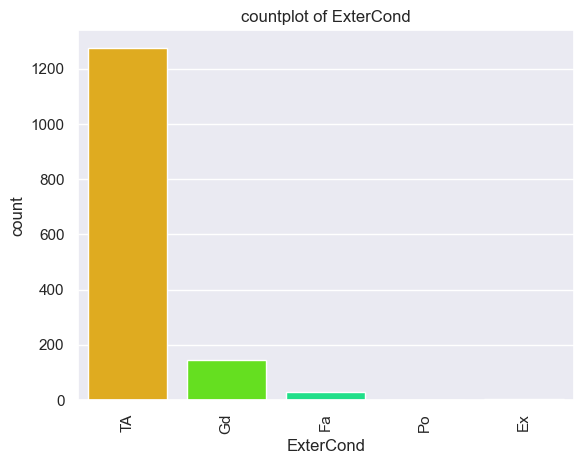

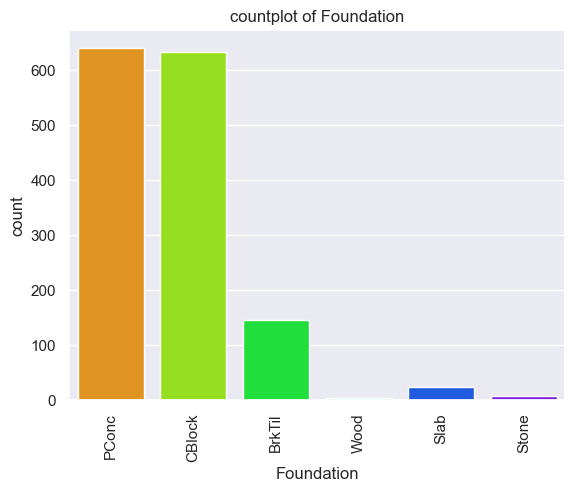

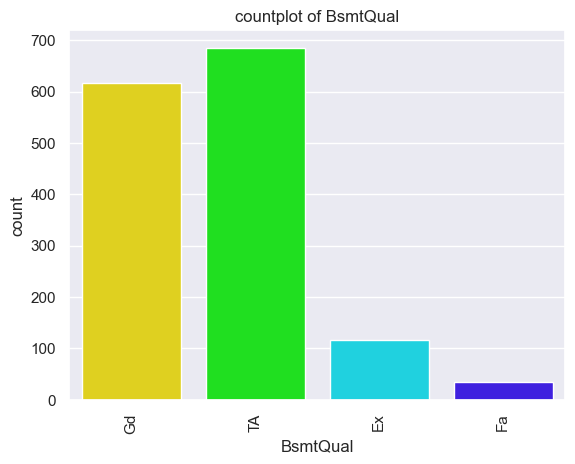

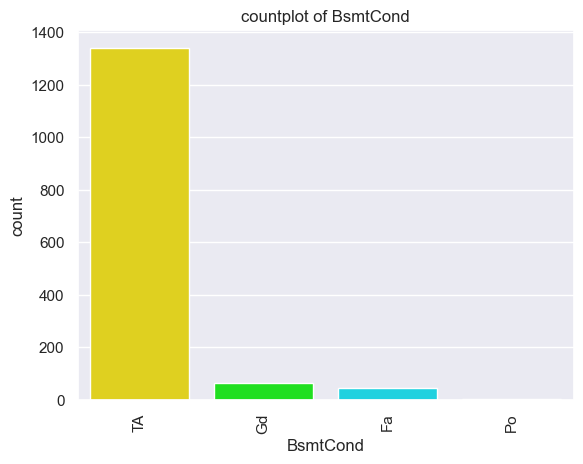

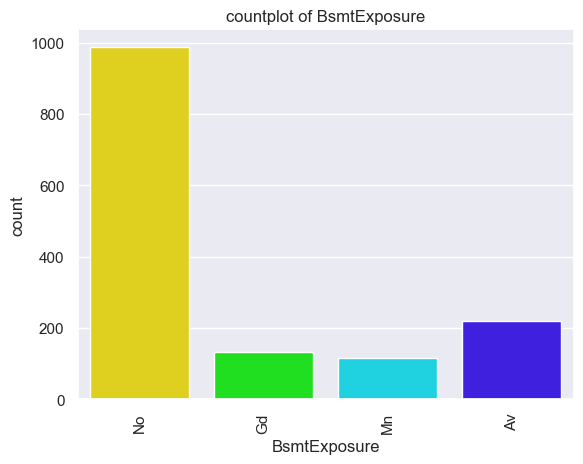

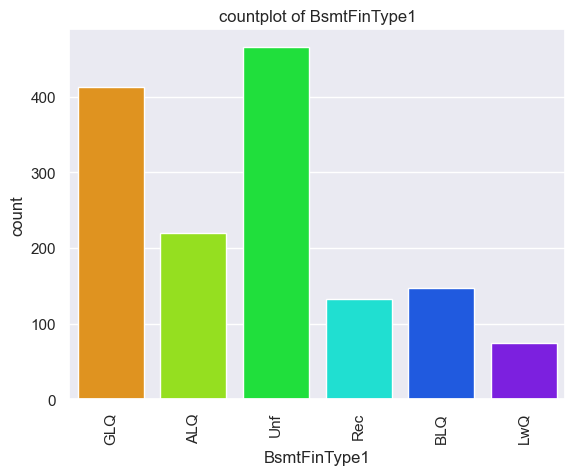

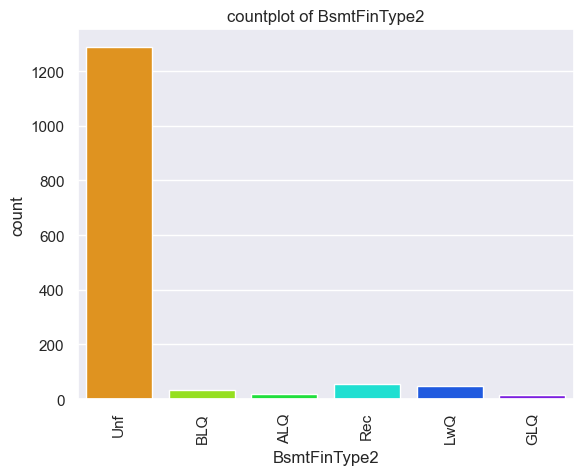

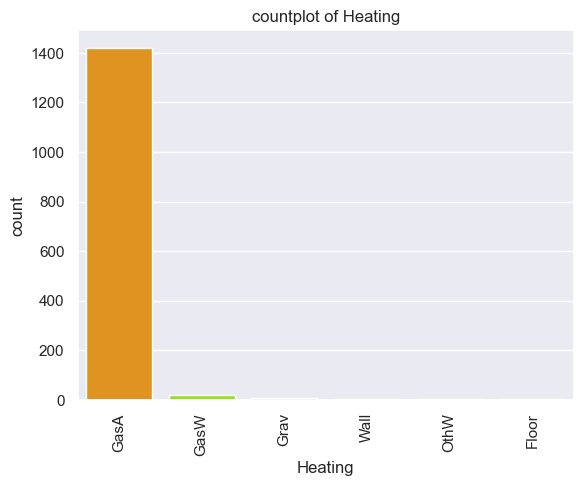

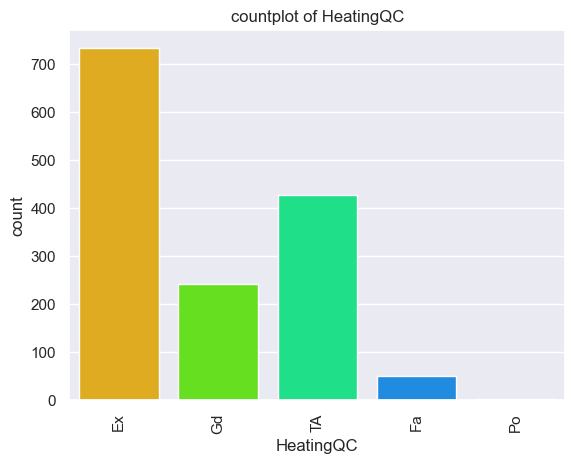

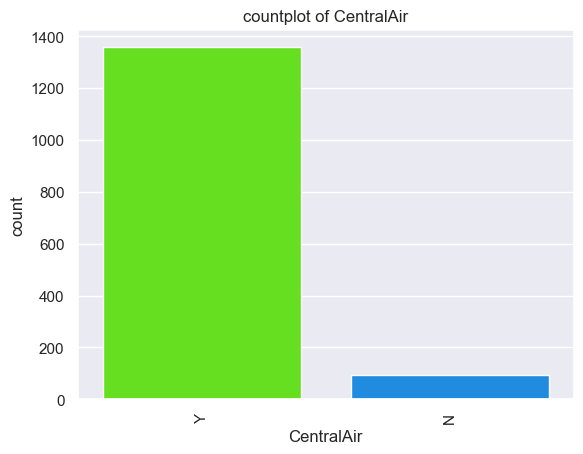

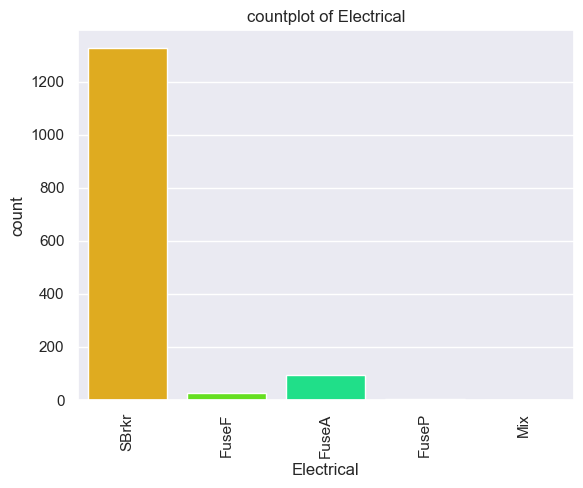

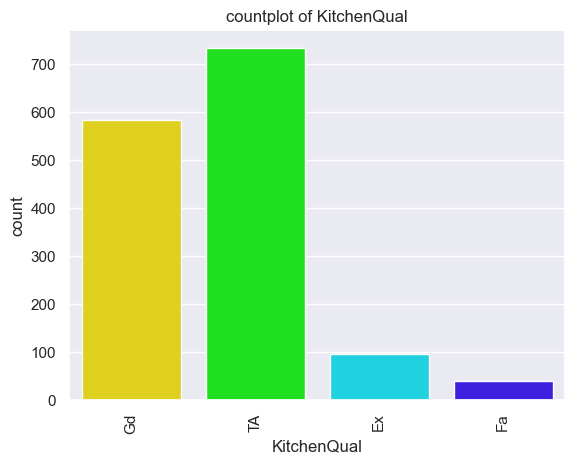

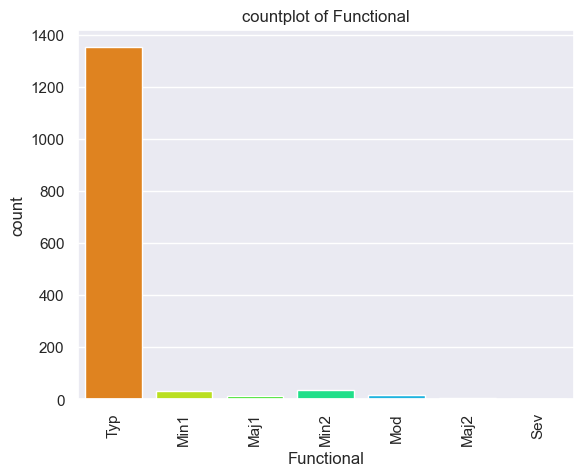

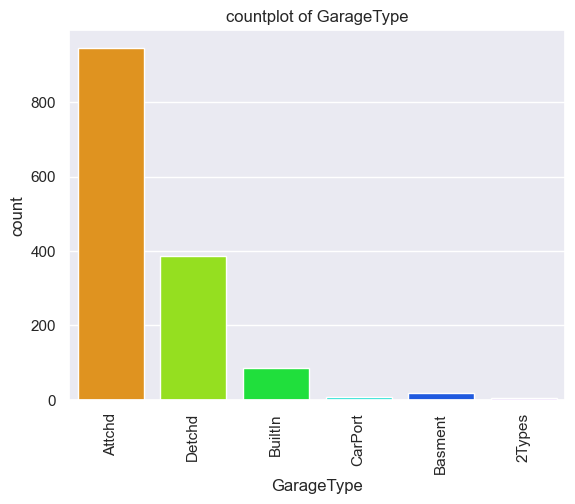

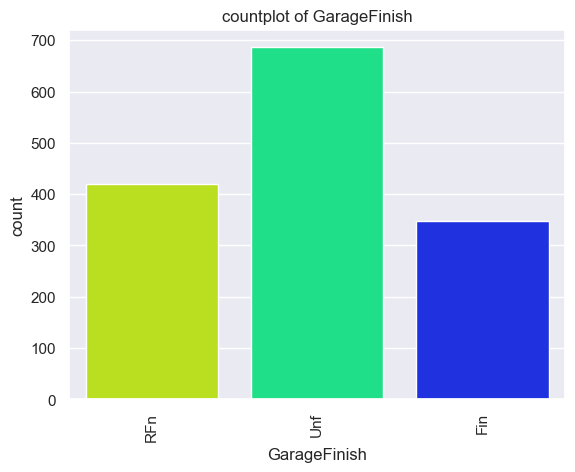

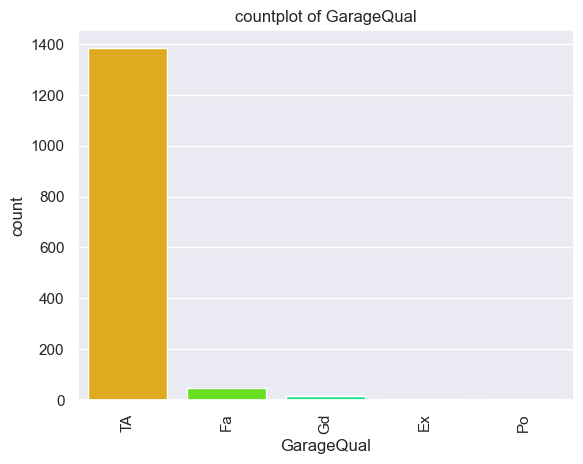

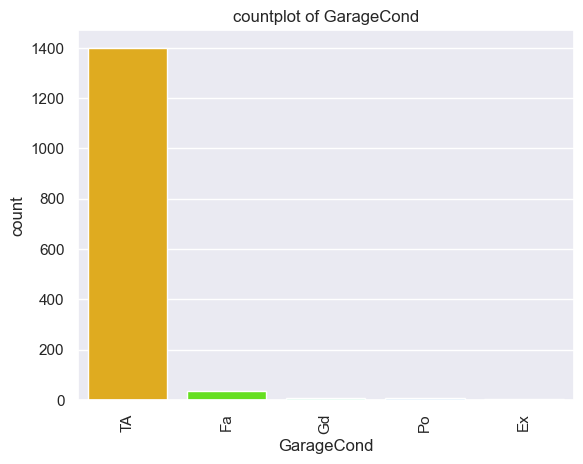

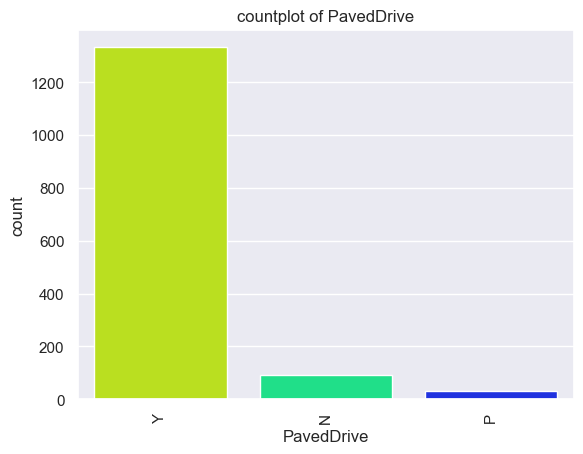

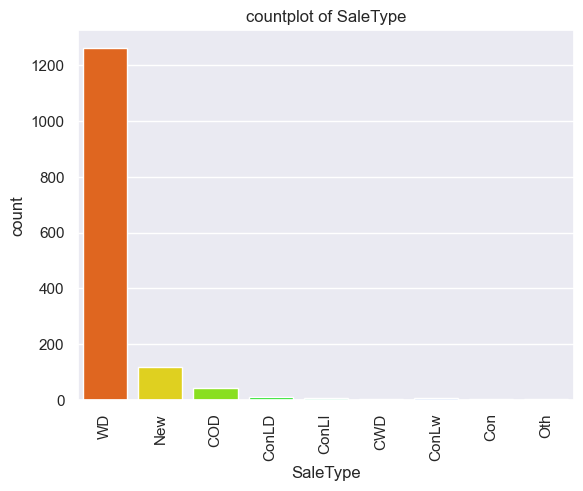

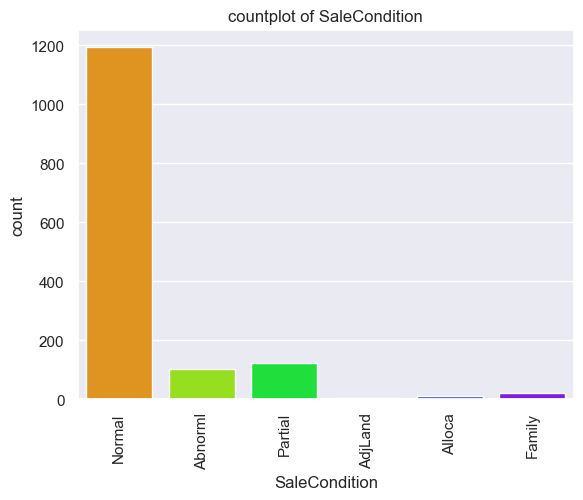

In [81]:
# using for loop you can plot countplot : of all categorical columns : 
fig = plt.figure(figsize=(5,6))

for col in categorical:
    
    sns.countplot(x=col, data=df, palette = "gist_rainbow")
    plt.xticks(rotation=90)
    plt.title(f"countplot of {col}")
    
    plt.show()
fig.tight_layout(pad=0.2)

#### BIVARIATE Analysis: 
- Need to find out more about the relationship between all these features with one another.
- Alreay plot scatterplot of highly correlated 10 features with saleprice. 
- Also plot heatmap .

In [ ]:
- Heatmap : checking correlation between columns 

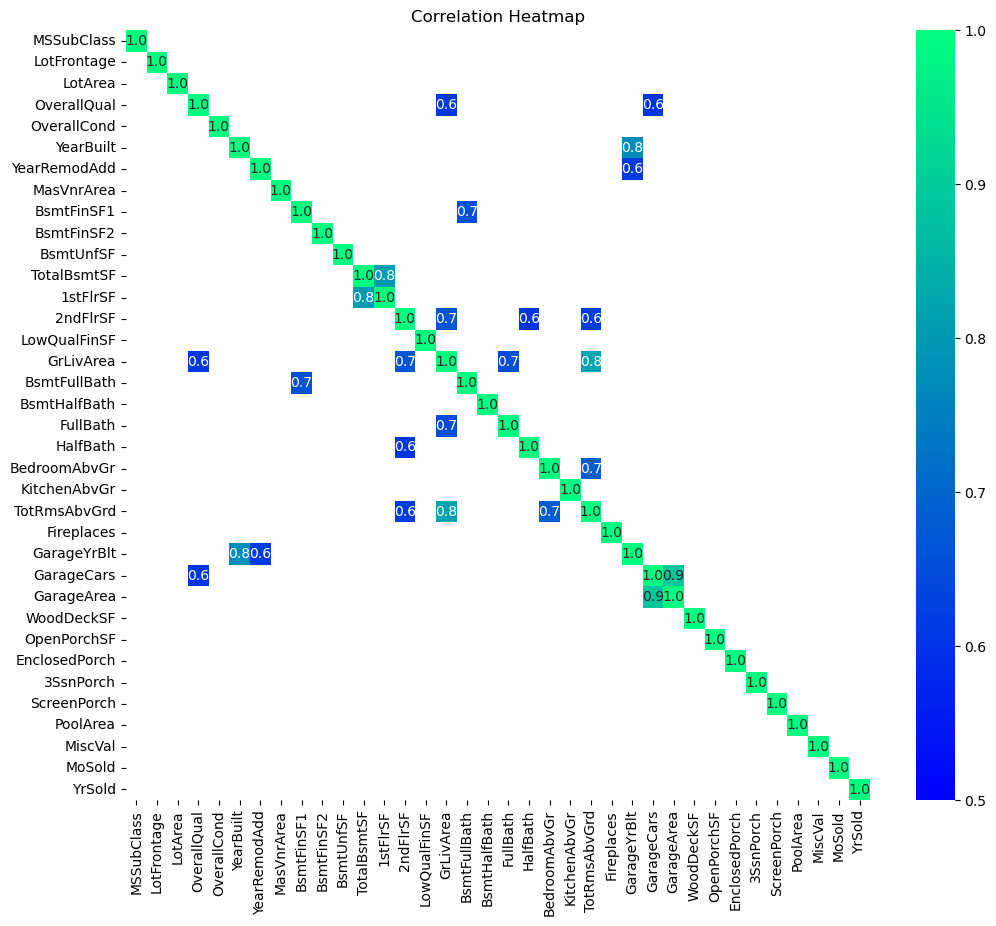

In [49]:
# Create correlation matrix from train data excluding `SalePrice`
corr_mat = df.iloc[:, :-1].corr() # all columns except Sale price column 

# Select correlations greater than 0.6
high_corr_mat = corr_mat[abs(corr_mat) >= 0.6] # highly strongly correlated features.

# Plot correlation heatmap 

plt.figure(figsize=(12, 10))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='winter',
            vmin=0.5,
            vmax=1)

title = plt.title('Correlation Heatmap')

#### ALSO CHECK HOW MANY SAME ROW CONTAIN 0 VALUES not usful columns for further analysis : 

In [44]:
# i see many columns  also have zeros :
col_zeros=df.eq(0).sum(axis=0)# for row 
threshold=0.98 # set threshold upto 80% of zeros
zero_per=(df==0).mean()
print(zero_per)
coldrop=zero_per[zero_per>=threshold].index

print(coldrop)


MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.000000
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.000000
MasVnrArea       0.597385
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.000000
BsmtCond         0.000000
BsmtExposure     0.000000
BsmtFinType1     0.000000
BsmtFinSF1       0.320716
BsmtFinType2     0.000000
BsmtFinSF2       0.886442
BsmtUnfSF        0.081211
TotalBsmtSF      0.025465
Heating          0.000000
HeatingQC   

In [45]:
print(coldrop) # I WILL DROP ABOVE 3  COLUMNS BECAUSE IT HAVING LARGE NUMBER OF ZEROS SO ITS NOT AFFECTING SALEPRICE 
# ALSO MORE NUMBER OF ZEROS NOT PRODUCING GOOD RESULT 

Index(['LowQualFinSF', '3SsnPorch', 'PoolArea'], dtype='object')


In [46]:
df.drop(columns=coldrop,axis=1, inplace=True) # delete above 3 columns 

In [47]:
df.shape # LowQualFinSF', '3SsnPorch', 'PoolArea columns dropped more number of zros not much affecting price 98% zeros 

(1453, 72)

## 4.feature Engineering : 

- first do addition of  columns together : reduce the complexity. then do encoding 
- adding some columns to form new column .


In [54]:
df[['GarageYrBlt','YearBuilt','YearRemodAdd','MoSold','YrSold']].describe()

,GarageYrBlt,YearBuilt,YearRemodAdd,MoSold,YrSold
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,1978.484515,1971.138334,1984.789401,6.324157,2007.814866
std,23.993642,30.197139,20.649701,2.700413,1.329678
min,1900.000000,1872.000000,1950.000000,1.000000,2006.000000
25%,1962.000000,1954.000000,1966.000000,5.000000,2007.000000
50%,1980.000000,1972.000000,1994.000000,6.000000,2008.000000
75%,2001.000000,2000.000000,2004.000000,8.000000,2009.000000
max,2010.000000,2010.000000,2010.000000,12.000000,2010.000000


In [48]:
# Convert year related columns to number of years, to find how old the house is, or how many years ago that particular
# house was sold.
# there 4 date time features -YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

df['YearRemodel'] = 2023 - df['YearRemodAdd']
df['GarageAge'] = 2023 - df['GarageYrBlt']
df['YrSold'] = 2023 - df['YrSold']

#df.drop(['GarageYrBlt'], axis=1, inplace=True)

In [51]:
df.drop(columns={'YearBuilt','YearRemodAdd','GarageYrBlt'},axis=1,inplace=True)

KeyError: "['YearBuilt', 'GarageYrBlt', 'YearRemodAdd'] not found in axis"

In [52]:
df.shape

(1453, 72)

In [53]:
# reducing columns numbers and creating one column from many columns.  
df['TotalSF'] = df['TotalBsmtSF']+df['1stFlrSF']+df['2ndFlrSF']
df=df.drop(columns={'TotalBsmtSF','1stFlrSF', '2ndFlrSF'})

df['Bsmt'] = df['BsmtFinSF1']+ df['BsmtFinSF2']
df = df.drop(columns={'BsmtFinSF1','BsmtFinSF2'})

df['TotalBathroom'] = df['FullBath'] +(0.5)*df['HalfBath']
df = df.drop(columns={'FullBath','HalfBath'})

df['BsmtBath'] = df['BsmtFullBath']+(0.5)*df['BsmtHalfBath'] # basement bathrooms added.
df=df.drop(columns={'BsmtFullBath', 'BsmtHalfBath'})


df['TotalPorch'] =df['EnclosedPorch']+df['OpenPorchSF']+df['ScreenPorch']+df['WoodDeckSF'] #  df['3SsnPorch'] ALREADY DROPEED 
df=df.drop(columns={'EnclosedPorch','OpenPorchSF','ScreenPorch','WoodDeckSF'})


# add bedroom and kitchen making total rooms 
# no need to add  TotRmsAbvGrd this feature is there so no need to separate bvedrooms and kitchen grading is required. 
#df['TotRooms'] = df['BedroomAbvGr']+df['KitchenAbvGr'] # basement bathrooms added.
# df=df.drop(columns={'BedroomAbvGr','KitchenAbvGr'})# BedroomAbvG , KitchenAbvGr

In [59]:
df.shape

(1453, 64)

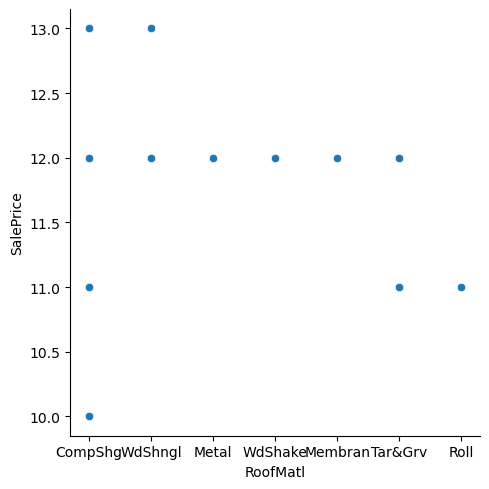

In [72]:
sns.relplot(data=df, x='RoofMatl', y="SalePrice")
plt.show() # no relationship between RoofMatalt with saleprice 

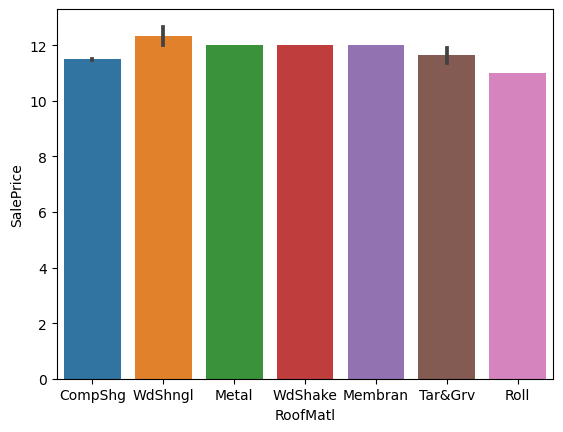

In [73]:
sns.barplot(data=df, x='RoofMatl', y="SalePrice")
plt.show()


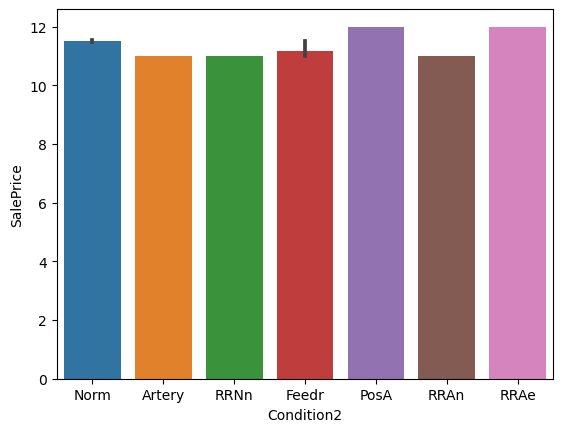

In [74]:
sns.barplot(data=df, x='Condition2', y="SalePrice")
plt.show()


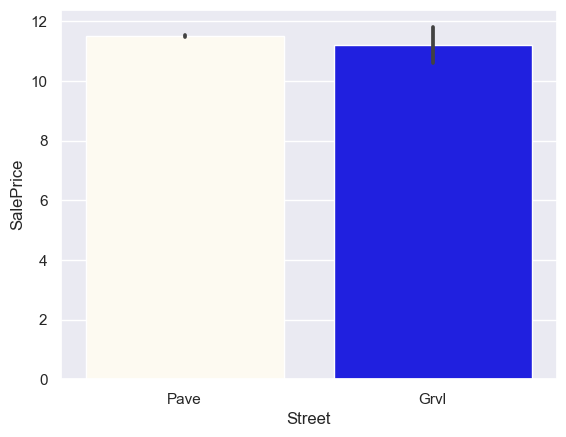

In [106]:
sns.barplot(data=df, x='Street', y="SalePrice")
plt.show()
# only pave strret more  and no relationship with sale price 

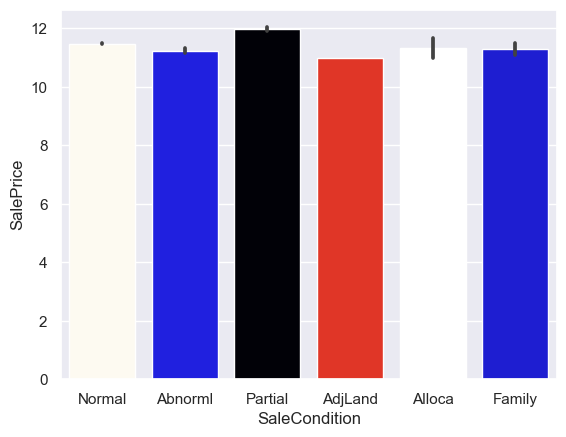

In [103]:
sns.barplot(x='SaleCondition',y='SalePrice',data=df)
plt.show()
# no relationship 


In [54]:
df['Utilities'].value_counts()

AllPub    1452
NoSeWa       1
Name: Utilities, dtype: int64

In [55]:

df.drop(columns='Utilities',inplace=True,axis=1)
print('Drop Utilities \n')
'''# this categorical Features with >95% of the same value
# these features totaly nosewa having only one value so it is no use for category '''
# why drop this Utilities column -because this column contain only one category Allpub , it consider as a constzant value ,
# in most cases  we drop it ,because it not not giving useful information for output


Drop Utilities 



'# this categorical Features with >95% of the same value\n# these features totaly nosewa having only one value so it is no use for category '

In [56]:
df.drop(columns=['MiscVal','OverallCond','GarageCars','BedroomAbvGr','KitchenAbvGr','BsmtQual','GarageQual','Street', 'Heating',
                 'RoofMatl' ],inplace=True,axis=1) 

print('Drop MiscVal ,OverallCond,GarageCars,BedroomAbvGr,KitchenAbvGr, BsmtQual,GarageQual, Street, Heating,RoofMatl \n')
# 10 columns : dropped from numerical as well as categorical columns using describe ()
# RoofMatl - constant value 


# we're going to drop condition_2 because it will skew our data too much,ALSO TOP VALUE COUNTS 1450 ALMOST CONSTANT .
# LIKE UTILITIES ,STREET FEATURE WE CAN DROP HERE. Condition2
print(df.shape)
df.drop(['Condition2'], axis=1, inplace=True)
print(df.shape)

Drop MiscVal ,OverallCond,GarageCars,BedroomAbvGr,KitchenAbvGr, BsmtQual,GarageQual, Street, Heating,RoofMatl 

(1453, 53)
(1453, 52)


## 5. FEATURE ENCODING 

- We need to convert these categorical variables to numbers such that the model is able to 
   understand and extract valuable information.
 - Two types of categorical data
 - Ordinal Data: The categories have an inherent order
- Nominal Data: The categories do not have an inherent order

In [57]:
df_ = df.select_dtypes(exclude=['int', 'float']) # excluding numerical columns 
for x in range(0,34):   # 0 to 34 categorical columns we have to display  here x is index 
    print ("---- {} ---".format(df_.columns[x]))
    print("Null count:",df_.iloc[:,x].isnull().sum()) # also print null values are not.
    print(df_.iloc[:,x].value_counts(dropna=False).sort_index(ascending=True))
    print()

---- MSZoning ---
Null count: 0
C (all)      10
FV           65
RH           16
RL         1144
RM          218
Name: MSZoning, dtype: int64

---- LotShape ---
Null count: 0
IR1    481
IR2     41
IR3      9
Reg    922
Name: LotShape, dtype: int64

---- LandContour ---
Null count: 0
Bnk      61
HLS      50
Low      35
Lvl    1307
Name: LandContour, dtype: int64

---- LotConfig ---
Null count: 0
Corner      262
CulDSac      94
FR2          47
FR3           4
Inside     1046
Name: LotConfig, dtype: int64

---- LandSlope ---
Null count: 0
Gtl    1376
Mod      64
Sev      13
Name: LandSlope, dtype: int64

---- Neighborhood ---
Null count: 0
Blmngtn     17
Blueste      2
BrDale      16
BrkSide     58
ClearCr     28
CollgCr    150
Crawfor     51
Edwards     98
Gilbert     79
IDOTRR      37
MeadowV     17
Mitchel     48
NAmes      225
NPkVill      9
NWAmes      73
NoRidge     40
NridgHt     74
OldTown    113
SWISU       25
Sawyer      74
SawyerW     59
Somerst     86
StoneBr     25
Timber     

IndexError: index 31 is out of bounds for axis 0 with size 31

In [59]:
from sklearn.preprocessing import LabelEncoder


#### Transform Numerical Variables to Categorical Variables:

In [60]:
num_cat = ['MSSubClass']

for col in num_cat:
    df[col] = df[col].apply(str)

In [88]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1453.0,69.055747,12.917424,49.000000,60.000000,69.000000,79.000000,91.000000
LotArea,1453.0,9555.064831,2811.326155,5000.000000,7535.000000,9453.000000,11553.000000,14226.400000
OverallQual,1453.0,6.088782,1.371077,1.000000,5.000000,6.000000,7.000000,10.000000
MasVnrArea,1453.0,101.887130,179.223197,0.000000,0.000000,0.000000,162.000000,1600.000000
BsmtUnfSF,1453.0,564.580179,438.550601,0.000000,223.000000,474.000000,806.000000,2336.000000
GrLivArea,1453.0,7.264687,0.329820,5.811141,7.028201,7.284821,7.481556,8.406485
TotRmsAbvGrd,1453.0,6.504474,1.612883,2.000000,5.000000,6.000000,7.000000,14.000000
Fireplaces,1453.0,0.609085,0.641731,0.000000,0.000000,1.000000,1.000000,3.000000
GarageArea,1453.0,470.340674,209.602757,0.000000,328.000000,478.000000,576.000000,1248.000000
MoSold,1453.0,6.324157,2.700413,1.000000,5.000000,6.000000,8.000000,12.000000


df.describe(include='O').T

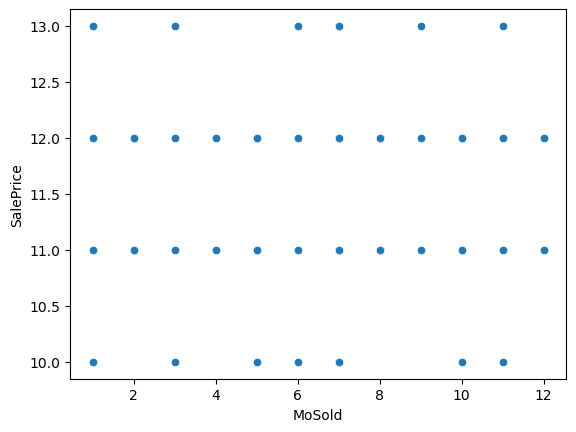

In [61]:
# no use of month sold 
sns.scatterplot(x="MoSold",y="SalePrice",data=df)
plt.show()# no relationship between MoSold and SalePrice every mothe sale price is same so we can drop .

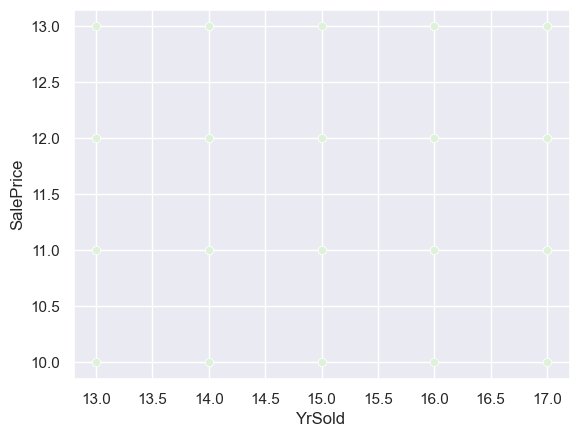

In [91]:
sns.scatterplot(x="YrSold",y="SalePrice",data=df)
plt.show()
# every year house saled with prize no realtionship . so i drop it.

In [62]:
df.drop(['MoSold'], axis=1, inplace=True)
df.drop(['YrSold'], axis=1, inplace=True)
print(df.shape)
''' no relationship with sale price so we dropped it.'''

(1453, 50)


' no relationship with sale price so we dropped it.'

In [63]:
##identifying categorical variables
categorical2 = df.select_dtypes(include=['object'])
categorical2 = categorical2.columns

In [70]:
len(categorical2)

32

In [64]:
 from sklearn.preprocessing import  LabelEncoder # import LabelEncoder

In [65]:
# Ordinal categorical columns
label_encoding_cols = [
     "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
     "ExterCond", "ExterQual", "Functional","CentralAir",
     "HeatingQC", "KitchenQual", "LandSlope","Electrical",
    "LotShape", "PavedDrive","GarageFinish","GarageCond"
]

# Apply Label Encoder
label_encoder = LabelEncoder()

for col in label_encoding_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [74]:
# we can drop central air , heatingqc  because functional columns shows same property rating Home functionality rating- 
# but applied later after scaling check the correaltion highest correalted featurec.

'''MSZoning','MsSubClass'  'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 
       'Foundation', 'GarageType',  ,
       'SaleType', 'SaleCondition' '''

"MSZoning','MsSubClass'  'LandContour', 'LotConfig',\n       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',\n       'Exterior1st', 'Exterior2nd', 'MasVnrType', \n       'Foundation', 'GarageType',  ,\n       'SaleType', 'SaleCondition' "

In [75]:
df.shape

(1453, 50)

In [66]:
cat_cols_n = df.select_dtypes(include=['object']).columns
cat_cols_n

Index(['MSSubClass', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'SaleType',
       'SaleCondition'],
      dtype='object')

- Use Target Encoding :

In [67]:
#Target encoder :
import category_encoders as ce # target encoder 
enc=ce.TargetEncoder() 


In [69]:
df[cat_cols_n]=enc.fit_transform(df[cat_cols_n],df['SalePrice'])
''' Applied Target Encoding'''

' Applied Target Encoding'

In [70]:
pd.concat([df,df[cat_cols_n]],axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,HeatingQC,CentralAir,Electrical,GrLivArea,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageArea,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice,HouseAge,YearRemodel,GarageAge,TotalSF,Bsmt,TotalBathroom,BsmtBath,TotalPorch,MSSubClass,MSZoning,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,GarageType,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,11.969697,11.576049,65.0,8450.0,3,11.503443,11.479924,0,11.720000,11.525100,11.531301,11.744921,7,11.481124,11.746094,11.752495,11.661400,196,2,4,11.823713,3,3,2,5,150,0,1,4,7.444833,2,8,6,0,11.614165,1,548,4,2,11.467933,11.482412,12,5,20,20,2566,706,2.5,1.0,61,11.969697,11.576049,11.503443,11.479924,11.720000,11.525100,11.531301,11.744921,11.481124,11.746094,11.752495,11.661400,11.823713,11.614165,11.467933,11.482412
2,11.479323,11.576049,80.0,9600.0,3,11.503443,11.530100,0,11.620450,11.238157,11.531301,11.439667,6,11.481124,11.264840,11.262911,11.363949,0,3,4,11.276461,3,1,0,5,284,0,1,4,7.141245,3,6,6,1,11.614165,1,460,4,2,11.467933,11.482412,12,31,47,47,2524,978,2.0,0.5,298,11.479323,11.576049,11.503443,11.530100,11.620450,11.238157,11.531301,11.439667,11.481124,11.264840,11.262911,11.363949,11.276461,11.614165,11.467933,11.482412
3,11.969697,11.576049,68.0,11250.0,0,11.503443,11.479924,0,11.720000,11.525100,11.531301,11.744921,7,11.481124,11.746094,11.752495,11.661400,162,2,4,11.823713,3,2,2,5,434,0,1,4,7.488294,2,6,6,1,11.614165,1,608,4,2,11.467933,11.482412,12,7,21,22,2706,486,2.5,1.0,42,11.969697,11.576049,11.503443,11.479924,11.720000,11.525100,11.531301,11.744921,11.481124,11.746094,11.752495,11.661400,11.823713,11.614165,11.467933,11.482412
4,11.401854,11.576049,60.0,9550.0,0,11.503443,11.503817,0,11.715903,11.525100,11.531301,11.744921,7,11.481124,11.281553,11.364942,11.363949,0,3,4,11.164385,1,3,0,5,540,2,1,4,7.448916,2,7,6,1,11.149871,2,642,4,2,11.467933,11.257500,11,91,53,25,2473,216,1.0,1.0,307,11.401854,11.576049,11.503443,11.503817,11.715903,11.525100,11.531301,11.744921,11.481124,11.281553,11.364942,11.363949,11.164385,11.149871,11.467933,11.257500
5,11.969697,11.576049,84.0,14226.4,0,11.503443,11.530100,0,12.028847,11.525100,11.531301,11.744921,8,11.481124,11.746094,11.752495,11.661400,350,2,4,11.823713,3,0,2,5,490,0,1,4,7.695758,2,9,6,1,11.614165,1,836,4,2,11.467933,11.482412,12,8,23,23,3343,655,2.5,1.0,276,11.969697,11.576049,11.503443,11.530100,12.028847,11.525100,11.531301,11.744921,11.481124,11.746094,11.752495,11.661400,11.823713,11.614165,11.467933,11.482412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,11.969697,11.576049,62.0,7917.0,3,11.503443,11.479924,0,11.935524,11.525100,11.531301,11.744921,6,11.481124,11.746094,11.752495,11.363949,0,3,4,11.823713,3,3,5,5,953,0,1,4,7.407318,3,7,6,1,11.614165,1,460,4,2,11.467933,11.482412,12,8,23,24,2600,0,2.5,0.0,40,11.969697,11.576049,11.503443,11.479924,11.935524,11.525100,11.531301,11.744921,11.481124,11.746094,11.752495,11.363949,11.823713,11.614165,11.467933,11.482412
1457,11.479323,11.576049,85.0,13175.0,3,11.503443,11.479924,0,11.779443,11.525100,11.531301,11.439667,6,11.481124,11.546290,11.485916,11.935471,119,3,4,11.276461,3,3,0,4,589,4,1,4,7.637234,3,7,2,2,11.614165,2,500,4,2,11.467933,11.482412,12,32,35,45,3615,953,2.0,1.0,349,11.479323,11.576049,11.503443,11.479924,11.779443,11.525100,11.531301,11.439667,11.481124,11.546290,11.485916,11.935471,11.276461,1

In [71]:
# from above concat columns are duplicates columns so remove it. 
df = df.drop_duplicates()
print( df.shape )

(1452, 50)


In [106]:
df # final done  encoding 

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,HeatingQC,CentralAir,Electrical,GrLivArea,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageArea,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice,HouseAge,YearRemodel,GarageAge,TotalSF,Bsmt,TotalBathroom,BsmtBath,TotalPorch
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,11.969697,11.576049,65.0,8450.0,3,11.503443,11.479924,0,11.720000,11.525100,11.531301,11.744921,7,11.481124,11.746094,11.752495,11.661400,196,2,4,11.823713,3,3,2,5,150,0,1,4,7.444249,2,8,6,0,11.614165,1,548,4,2,11.467933,11.482412,12,20,20,20,2566,706,2.5,1.0,61
2,11.479323,11.576049,80.0,9600.0,3,11.503443,11.530100,0,11.620450,11.238157,11.531301,11.439667,6,11.481124,11.264840,11.262911,11.363949,0,3,4,11.276461,3,1,0,5,284,0,1,4,7.140453,3,6,6,1,11.614165,1,460,4,2,11.467933,11.482412,12,47,47,47,2524,978,2.0,0.5,298
3,11.969697,11.576049,68.0,11250.0,0,11.503443,11.479924,0,11.720000,11.525100,11.531301,11.744921,7,11.481124,11.746094,11.752495,11.661400,162,2,4,11.823713,3,2,2,5,434,0,1,4,7.487734,2,6,6,1,11.614165,1,608,4,2,11.467933,11.482412,12,22,21,22,2706,486,2.5,1.0,42
4,11.401854,11.576049,60.0,9550.0,0,11.503443,11.503817,0,11.715903,11.525100,11.531301,11.744921,7,11.481124,11.281553,11.364942,11.363949,0,3,4,11.164385,1,3,0,5,540,2,1,4,7.448334,2,7,6,1,11.149871,2,642,4,2,11.467933,11.257500,11,108,53,25,2473,216,1.0,1.0,307
5,11.969697,11.576049,84.0,14226.4,0,11.503443,11.530100,0,12.028847,11.525100,11.531301,11.744921,8,11.481124,11.746094,11.752495,11.661400,350,2,4,11.823713,3,0,2,5,490,0,1,4,7.695303,2,9,6,1,11.614165,1,836,4,2,11.467933,11.482412,12,23,23,23,3343,655,2.5,1.0,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,11.969697,11.576049,62.0,7917.0,3,11.503443,11.479924,0,11.935524,11.525100,11.531301,11.744921,6,11.481124,11.746094,11.752495,11.363949,0,3,4,11.823713,3,3,5,5,953,0,1,4,7.406711,3,7,6,1,11.614165,1,460,4,2,11.467933,11.482412,12,24,23,24,2600,0,2.5,0.0,40
1457,11.479323,11.576049,85.0,13175.0,3,11.503443,11.479924,0,11.779443,11.525100,11.531301,11.439667,6,11.481124,11.546290,11.485916,11.935471,119,3,4,11.276461,3,3,0,4,589,4,1,4,7.636752,3,7,2,2,11.614165,2,500,4,2,11.467933,11.482412,12,45,35,45,3615,953,2.0,1.0,349
1458,11.401854,11.576049,66.0,9042.0,3,11.503443,11.479924,0,11.715903,11.525100,11.531301,11.744921,7,11.481124,11.696458,11.674497,11.363949,0,0,2,11.469515,1,3,2,5,877,0,1,4,7.757906,2,9,6,2,11.614165,1,252,4,2,11.467933,11.482412,12,82,17,82,3492,275,2.0,0.0,60


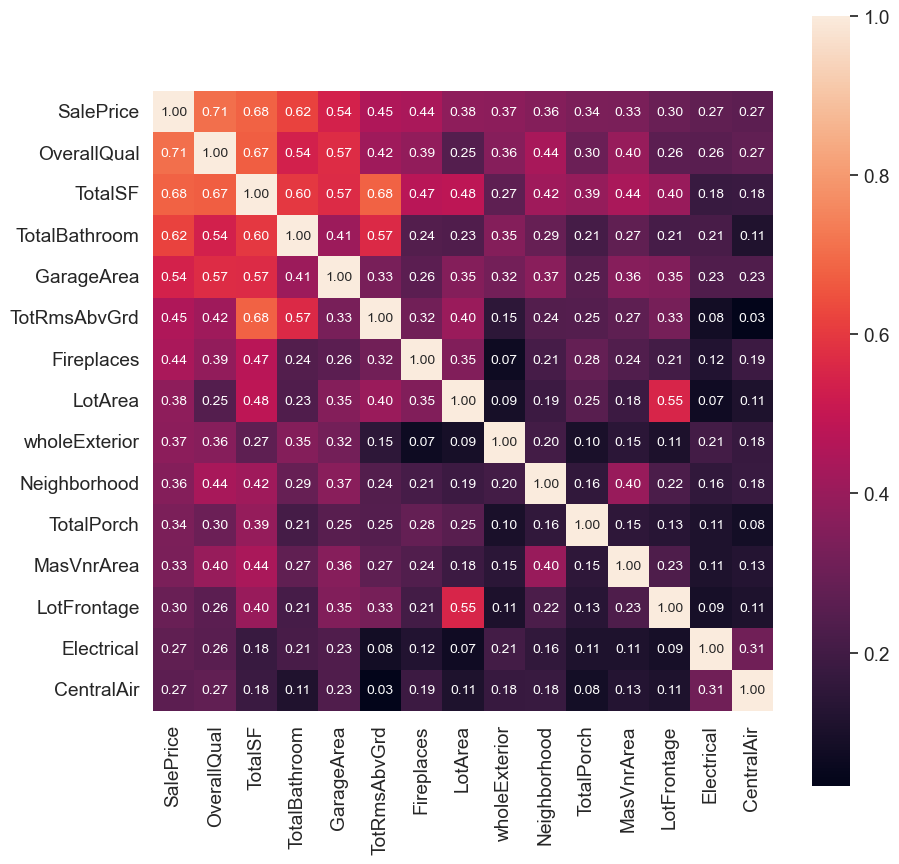

affecting target varaible most :  Index(['SalePrice', 'OverallQual', 'TotalSF', 'TotalBathroom', 'GarageArea',
       'TotRmsAbvGrd', 'Fireplaces', 'LotArea', 'wholeExterior',
       'Neighborhood', 'TotalPorch', 'MasVnrArea', 'LotFrontage', 'Electrical',
       'CentralAir'],
      dtype='object') 15


In [135]:
# SOME COLUMNS ALL STASTICAL VALUES ARE ZEROS ,SO WE CAN DROP 
#CHECK CORREALTATION :
cor = df.corr()
k = 15 #number of variables for heatmap
cols = cor.nlargest(k, 'SalePrice')['SalePrice'].index
cmt = np.corrcoef(df[cols].values.T) # correatiion matrix 
sns.set(font_scale=1.25)
plt.figure(figsize=(10,10))
hm = sns.heatmap(cmt, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
print("affecting target varaible most : ", cols, len(cols))

In [72]:
# some columns are highly correalated with each other 
'''TotalSF & GrLivArea ,first columns mostly dependent on saleprice so we drop GrLivArea '''
''' TotRmsAbvGrd  with GrLivArea- but i drop only GrLivArea'''  
df.drop(['GrLivArea'], axis=1, inplace=True)
df.shape


(1452, 49)

In [73]:
'

df.drop(['LandSlope'], axis=1, inplace=True)
df.shape
''' LandSlope, contains large numer of zeros as well stastical values almost zero .so we can drop it,
it is  not affecting output. '''

(1452, 48)

In [74]:
# we can add important columns after encoding for reducing columns :
 
df['wholeExterior'] = df['Exterior1st']+df['Exterior2nd']
df=df.drop(columns={'Exterior1st','Exterior2nd'})

# BsmtFinType1 BsmtFinType2
df['Bsmtfintotal'] = df['BsmtFinType1']+df['BsmtFinType2']
df=df.drop(columns={'BsmtFinType1','BsmtFinType2'})

- convert insame dattypes: 

In [75]:
df= df.astype('int64') # convert all datatypes into same type i.e int64

In [116]:
 #now to check if everything is numerical 
print(df.dtypes)

MSSubClass       int64
MSZoning         int64
LotFrontage      int64
LotArea          int64
LotShape         int64
LandContour      int64
LotConfig        int64
Neighborhood     int64
Condition1       int64
BldgType         int64
HouseStyle       int64
OverallQual      int64
RoofStyle        int64
MasVnrType       int64
MasVnrArea       int64
ExterQual        int64
ExterCond        int64
Foundation       int64
BsmtCond         int64
BsmtExposure     int64
BsmtUnfSF        int64
HeatingQC        int64
CentralAir       int64
Electrical       int64
KitchenQual      int64
TotRmsAbvGrd     int64
Functional       int64
Fireplaces       int64
GarageType       int64
GarageFinish     int64
GarageArea       int64
GarageCond       int64
PavedDrive       int64
SaleType         int64
SaleCondition    int64
SalePrice        int64
HouseAge         int64
YearRemodel      int64
GarageAge        int64
TotalSF          int64
Bsmt             int64
TotalBathroom    int64
BsmtBath         int64
TotalPorch 

### After encoding check skewness then apply log TRANSFORMATION. 

In [76]:
print(df['LotArea'].skew(), df['MasVnrArea'].skew() ,df['BsmtUnfSF'].skew(),df['GarageArea'].skew(),
      df['TotalSF'].skew(), df['TotalPorch'].skew())
#not use of applying log beacuse generate many  nan values .so skip it. directly do scaling 
''' no need do log transformation directly do scaling '''

0.0687263952195317 2.702414295552311 0.9086598369978268 0.04554058557321854 0.7236219960520385 1.1358860589214363


' no need do log transformation directly do scaling '

##### Split the data ,then do scaling data  only on input vcariables.  then apply regression model 

In [77]:
# split train and test set
from sklearn.model_selection import train_test_split
# import the sklearn libraries 

from sklearn.preprocessing import RobustScaler # Robust scaler ()
from sklearn.linear_model import LinearRegression, Lasso, Ridge # Linear regression model 
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor

# calculatae error :
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import  r2_score # check score for evaluation 




In [78]:
#Sepearate depdent and indepedent features 
X=df.drop('SalePrice',axis=1) # indepdent features
y=df['SalePrice']  # Dependent features.
X.shape # 1452 rows and 45 columns 


(1452, 45)

In [79]:
y.shape 

(1452,)

### Scaling : Robust scaler() or  Satandard scaler ()

In [91]:
# Initialize the Robust Scaler
scaler = RobustScaler()

#Fit and transform the training features using the Robust Scaler
X_scaled = scaler.fit_transform(X)
'''Scaled all indepdent features then split the data'''

'Scaled all indepdent features then split the data'

In [85]:
X_scaled.shape

(1452, 45)

### 4.Feature Selection : RFE 

In [86]:
from sklearn.feature_selection import RFE 

In [87]:
# Feature Selection using Linear Regression
model = LinearRegression()
rfe = RFE(model, n_features_to_select=15)  # Adjust the number of features as needed
X_selected = rfe.fit_transform(X_scaled, y)

selected_feature_names = np.array(X.columns)[rfe.support_]

In [88]:
selected_feature_names 

array(['MSSubClass', 'LotArea', 'LotShape', 'Neighborhood', 'OverallQual',
       'BsmtUnfSF', 'HeatingQC', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageFinish', 'HouseAge', 'YearRemodel', 'TotalSF', 'Bsmt',
       'TotalBathroom'], dtype=object)

In [89]:
print("length of SELECTED RFE FEATURES:",len(selected_feature_names ))

length of SELECTED RFE FEATURES: 15


### Split the dataset into test and train samples

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
''' Split the dataset into training and testing sets'''

' Split the dataset into training and testing sets'

# 5.  MODEL Creation : Apply regression models 
- Linear Regressoin ,lasso, ridge regressor
- Random forest regressor, xgboostregressor
- Ensemble all model together for simplification 
- Evaluation model - calculate errors, and r2 score etc
- Select best model for hyperparameter tunig 


- Create model with hypertuning -GridSearchCV
- except Linear Regression 

In [94]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [95]:

# Hyperparameter Tuning for Lasso Regression
lasso = Lasso()
param_grid_lasso = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, cv=5)

grid_search_lasso.fit(X_train, y_train) # already x train scaled before spliting the data. 

best_lasso = grid_search_lasso.best_estimator_

In [97]:
#Hyperparameter Tuning for Ridge Regression
ridge = Ridge()
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=5)

grid_search_ridge.fit(X_train, y_train) # already x train scaled before spliting the data. 
best_ridge = grid_search_ridge.best_estimator_

In [98]:
# Hyperparameter Tuning for Random Forest
rf = RandomForestRegressor()
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20]
}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

In [100]:
from xgboost import XGBRegressor

In [101]:
#Hyperparameter Tuning for XGBoost Regression
xgb = XGBRegressor()
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5)
grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_


### 6. Evaluate the models on the test set

In [102]:
y_pred_lasso = best_lasso.predict(X_test) # predict lasso 
y_pred_ridge = best_ridge.predict(X_test) # predict ridge
y_pred_xgb = best_xgb.predict(X_test) # predict xgb
y_pred_rf = best_rf.predict(X_test)# predict rf 

- check r2 score 

In [103]:
#R2 score of each model :
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_xgb = r2_score(y_test, y_pred_xgb)
r2_rf = r2_score(y_test, y_pred_rf)

In [104]:
print("R2 Score - Random Forest:", r2_rf)
print("R2 Score - Lasso Regression:", r2_lasso)
print("R2 Score - Ridge Regression:", r2_ridge)
print("R2 Score - XGBoost Regression:", r2_xgb)

R2 Score - Random Forest: 0.7239717474783685
R2 Score - Lasso Regression: 0.688290117027986
R2 Score - Ridge Regression: 0.69647104119459
R2 Score - XGBoost Regression: 0.7307757701390384


- Loss function caluculation - MSE,RMSE,MAE 

In [105]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print("Lasso Regression LOSS:")
print(f" mse_lasso(MSE): {mse_lasso:.2f}")
print(f" rmse_lasso (RMSE): {rmse_lasso:.2f}")
print(f" mae_lasso (MAE): {mae_lasso:.2f}")


Lasso Regression LOSS:
 mse_lasso(MSE): 0.09
 rmse_lasso (RMSE): 0.29
 mae_lasso (MAE): 0.23


In [109]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression loss:")
print(f" mse_ridge(MSE): {mse_ridge:.2f}")
print(f" rmse_ridge (RMSE): {rmse_ridge:.2f}")
print(f" mae_ridge (MAE): {mae_ridge:.2f}")

print(f"r2_ridge (R2): {r2_ridge:.2f}")

Ridge Regression loss:
 mse_ridge(MSE): 0.08
 rmse_ridge (RMSE): 0.29
 mae_ridge (MAE): 0.22
r2_ridge (R2): 0.70


In [110]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest loss :")
print(f"mse_rf (MSE): {mse_rf:.2f}")
print(f" rmse_rf_ridge (RMSE): {rmse_rf:.2f}")
print(f" mae_rf (MAE): {mae_rf:.2f}")

print(f"r2_rf (R2): {r2_rf:.2f}")

Random Forest loss :
mse_rf (MSE): 0.08
 rmse_rf_ridge (RMSE): 0.28
 mae_rf (MAE): 0.14
r2_rf (R2): 0.72


In [113]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost model loss:")
print(f"mse_xgb (MSE): {mse_xgb:.2f}")
print(f" rmse_xgb (RMSE): {rmse_xgb:.2f}")
print(f" mae_xgb (MAE): {mae_xgb:.2f}")

print(f"r2_xgb (R2): {r2_xgb:.2f}")

XGBoost model loss:
mse_xgb (MSE): 0.07
 rmse_xgb (RMSE): 0.27
 mae_xgb (MAE): 0.18
r2_xgb (R2): 0.73


In [114]:
# Compare the models based on their evaluation metrics
models = ["Lasso Regression", "Ridge Regression", "Random Forest", "XGBoost"]
mse_scores = [mse_lasso, mse_ridge, mse_rf, mse_xgb]
rmse_scores = [rmse_lasso, rmse_ridge, rmse_rf, rmse_xgb]
mae_scores = [mae_lasso, mae_ridge, mae_rf, mae_xgb]
r2_scores = [r2_lasso, r2_ridge, r2_rf, r2_xgb]

In [115]:
print("Model Comparison based on Evaluation Metrics:")
print("{:<20} {:<12} {:<12} {:<12} {:<12}".format("Model", "MSE", "RMSE", "MAE", "R2 Score"))
for model, mse_score, rmse_score, mae_score, r2_score in zip(models, mse_scores, rmse_scores, mae_scores, r2_scores):
    print("{:<20} {:<12.2f} {:<12.2f} {:<12.2f} {:<12.2f}".format(model, mse_score, rmse_score, mae_score, r2_score))


Model Comparison based on Evaluation Metrics:
Model                MSE          RMSE         MAE          R2 Score    
Lasso Regression     0.09         0.29         0.23         0.69        
Ridge Regression     0.08         0.29         0.22         0.70        
Random Forest        0.08         0.28         0.14         0.72        
XGBoost              0.07         0.27         0.18         0.73        


#### from above evaluation metrics : 
-  best moldel is Random forest regression model less erros and r2 score is best
- MSE=0.07 your model is  making accurate predictions 
- RMSE=0.26  QUITE GOOD 
- R2 SCORE-0.76 MEANS RF model explains 76% of the variance in the given dataset .

#### Select the best model and its features:

In [116]:
# Select the best model and its features
best_model = None
best_r2_score = max(r2_rf, r2_lasso, r2_ridge, r2_xgb)

if best_r2_score == r2_rf:
    best_model = best_rf
    
elif best_r2_score == r2_lasso:
    best_model = best_lasso
    
elif best_r2_score == r2_ridge:
    best_model = best_ridge
else:
    best_model = best_xgb

In [117]:
#Get the selected features from RFE
selected_features_best_model = np.array(X.columns)[rfe.support_]

In [120]:
print("Best Model:", best_model)


Best Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [121]:
print("Selected Features for Best Model:", selected_features_best_model)

Selected Features for Best Model: ['MSSubClass' 'LotArea' 'LotShape' 'Neighborhood' 'OverallQual'
 'BsmtUnfSF' 'HeatingQC' 'TotRmsAbvGrd' 'Fireplaces' 'GarageFinish'
 'HouseAge' 'YearRemodel' 'TotalSF' 'Bsmt' 'TotalBathroom']


### Create a DataFrame with the best features from all models

In [122]:
#Create a DataFrame with the best features from all models
best_features_df = pd.DataFrame({'Selected_Features': selected_features_best_model})

In [123]:
best_features_df  # select total 15 features 

,Selected_Features
0,MSSubClass
1,LotArea
2,LotShape
3,Neighborhood
4,OverallQual
5,BsmtUnfSF
6,HeatingQC
7,TotRmsAbvGrd
8,Fireplaces
9,GarageFinish


- Residuals of XGB model :

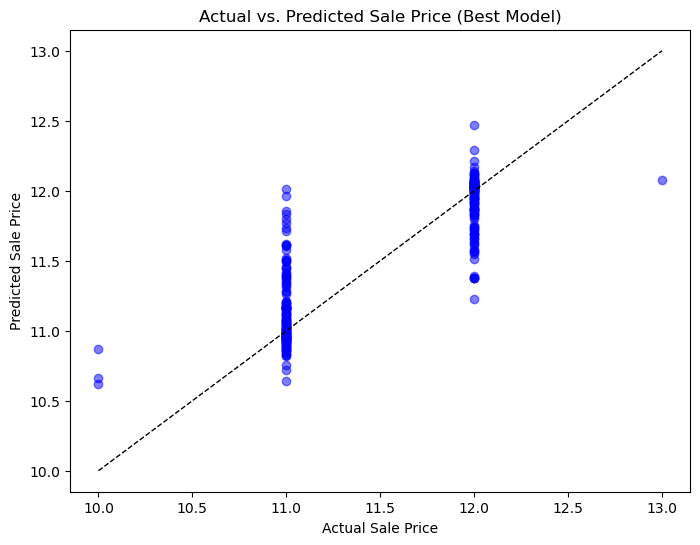

In [128]:
# Plot actual vs. predicted line for the best model
y_pred_best_model = best_model.predict(X_test)

plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred_best_model, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=1)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Price (Best Model)')
plt.show()



In [129]:
# Create a DataFrame with the best features from all models
selected_features_df = pd.DataFrame(columns=['Model', 'Selected_Features'])

selected_features_df = selected_features_df.append({'Model': 'Random Forest', 'Selected_Features': selected_feature_names}, ignore_index=True)
selected_features_df = selected_features_df.append({'Model': 'Lasso Regression', 'Selected_Features': selected_feature_names}, ignore_index=True)
selected_features_df = selected_features_df.append({'Model': 'Ridge Regression', 'Selected_Features': selected_feature_names}, ignore_index=True)
selected_features_df = selected_features_df.append({'Model': 'XGBoost Regression', 'Selected_Features': selected_feature_names}, ignore_index=True)

print("DataFrame with Selected Features from all models:")



DataFrame with Selected Features from all models:
                Model                                  Selected_Features
0       Random Forest  [MSSubClass, LotArea, LotShape, Neighborhood, ...
1    Lasso Regression  [MSSubClass, LotArea, LotShape, Neighborhood, ...
2    Ridge Regression  [MSSubClass, LotArea, LotShape, Neighborhood, ...
3  XGBoost Regression  [MSSubClass, LotArea, LotShape, Neighborhood, ...


In [132]:
selected_features_df

,Model,Selected_Features
0,Random Forest,"[MSSubClass, LotArea, LotShape, Neighborhood, ..."
1,Lasso Regression,"[MSSubClass, LotArea, LotShape, Neighborhood, ..."
2,Ridge Regression,"[MSSubClass, LotArea, LotShape, Neighborhood, ..."
3,XGBoost Regression,"[MSSubClass, LotArea, LotShape, Neighborhood, ..."


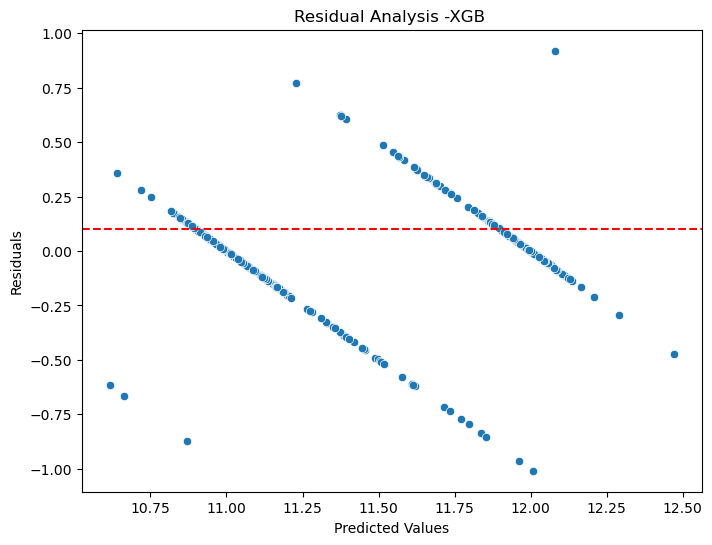

In [125]:
residuals = y_test - y_pred_xgb

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_xgb, y=residuals)
plt.axhline(y=0.1, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis -XGB ')
plt.show()


In [126]:
residuals = y_test - y_pred_xgb
print("residualsOR  eror in RF MODEL :",residuals)

residualsOR  eror in RF MODEL : Id
1042    0.622159
1131   -0.265768
1003   -0.024603
1325   -1.009092
534    -0.617208
          ...   
900     0.019813
1335    0.114232
1417   -0.117501
721     0.004433
255    -0.355408
Name: SalePrice, Length: 291, dtype: float64


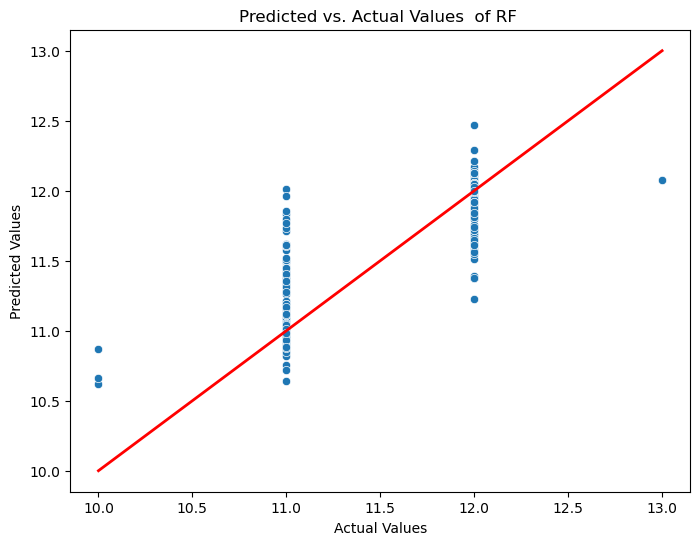

In [133]:
# Predicted vs. Actual Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb)
sns.lineplot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values  of RF ')
plt.show()

### SUMMARY :

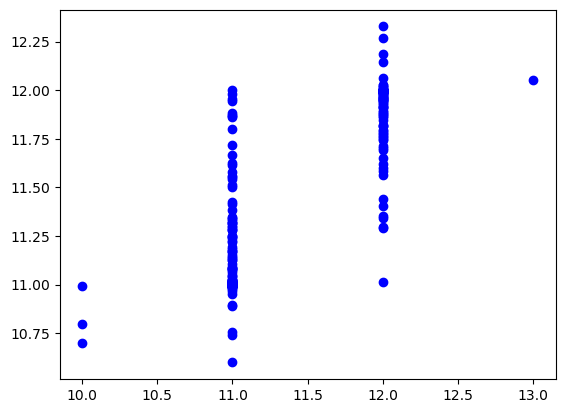

In [134]:
plt.scatter(y_test, y_pred_rf, color='blue', label='Linear Regression')

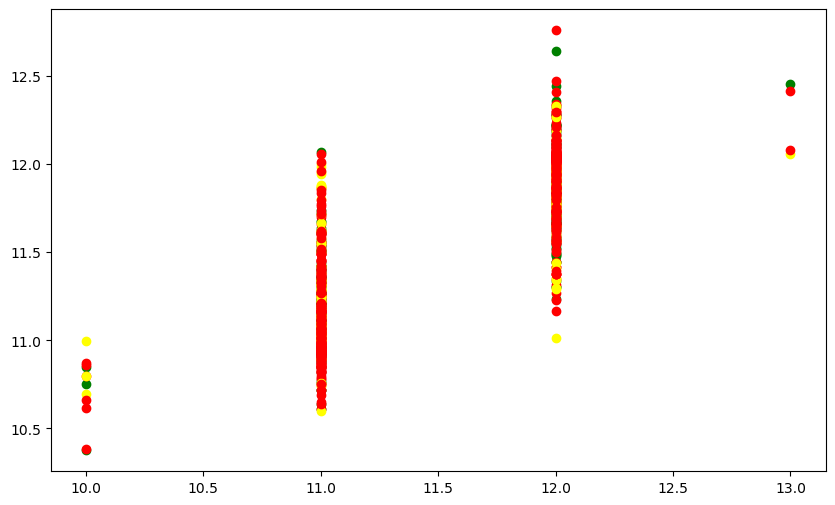

In [135]:
# Plot the line graph for each regression model
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_lasso, color='green', label='Lasso Regression')
plt.scatter(y_test, y_pred_ridge, color='red', label='Ridge Regression')
plt.scatter(y_test, y_pred_rf, color="yellow",label='Random Forest Regression')
plt.scatter(y_test, y_pred_xgb, color="red",label='XGBoost Regression')
plt.show()

In [136]:
results_df = pd.DataFrame({"Actual Prices": y_test,"Lasso Regression":y_pred_lasso,
                          "Ridge Regression":y_pred_ridge,"Random Forest":y_pred_rf,"XGBoost": y_pred_xgb })


In [137]:
results_df # check sale price of each model 

,Actual Prices,Lasso Regression,Ridge Regression,Random Forest,XGBoost
Id,,,,,
1042,12,11.302802,11.313512,11.342633,11.377841
1131,11,11.335586,11.330792,11.299693,11.265768
1003,12,12.036721,12.045984,11.999990,12.024603
1325,11,12.070155,12.053365,11.999990,12.009092
534,10,10.376540,10.383608,10.696667,10.617208
...,...,...,...,...,...
900,11,11.178835,11.130034,11.000000,10.980187
1335,11,11.038412,10.983363,11.010000,10.885768
1417,11,11.173994,11.103541,11.065918,11.117501


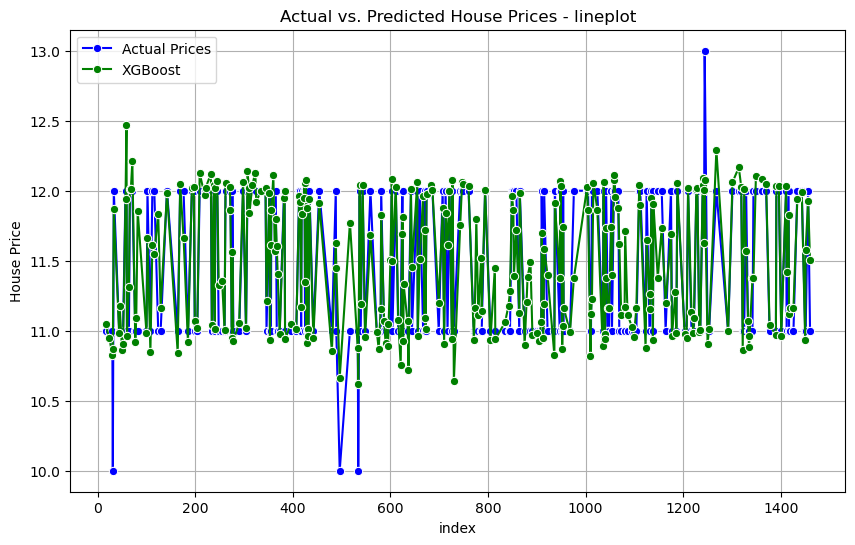

In [138]:
plt.figure(figsize=(10, 6))
#sns.lineplot(data=results_df,x='results_df.index',y='Actual Prices',label='Actual Prices',marker='o')
#sns.lineplot(data=results_df,x='results_df.index',y='Actual Prices',label='Actual Prices',marker='o')

sns.lineplot(data=results_df['Actual Prices'],label='Actual Prices',marker='o',color='b',linestyle='-')
sns.lineplot(data=results_df['XGBoost'],label='XGBoost',marker='o',color='g',linestyle='-')
plt.xlabel('index')
plt.ylabel('House Price')
plt.title('Actual vs. Predicted House Prices - lineplot')
plt.legend()
plt.grid(True)
plt.show()

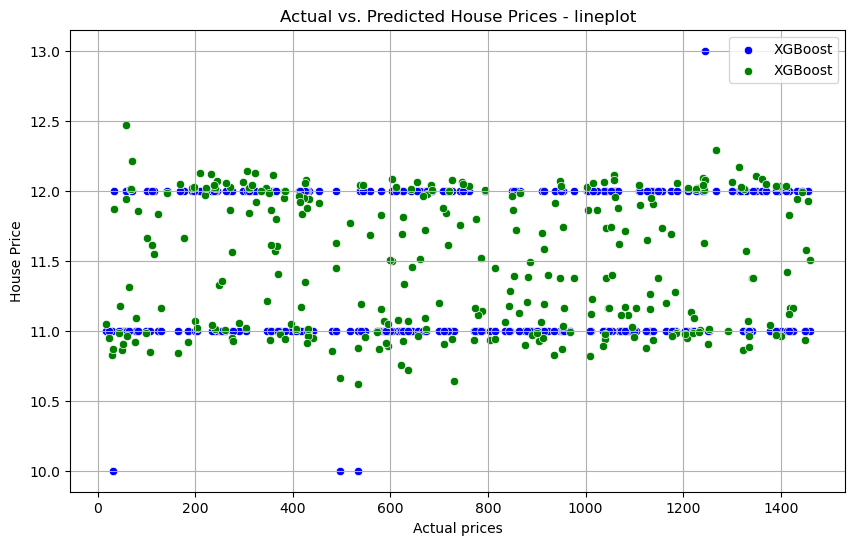

In [139]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df['Actual Prices'],label='XGBoost',marker='o',color='b',linestyle='-')
sns.scatterplot(data=results_df['XGBoost'],label='XGBoost',marker='o',color='g',linestyle='-')
plt.xlabel('Actual prices')
plt.ylabel('House Price')
plt.title('Actual vs. Predicted House Prices - lineplot')
plt.legend()
plt.grid(True)
plt.show()

## Summary :

- 1) from above results XGboost regressor model  is best model
- 2) then Random forest regressor model  .
- 3) The ideal ‘r2_score’ of a build should be more than 0.73 (at least > 0.60).


